# Symulacja ciągów pseudolosowych, ich filtracja i analiza
1. Symulować szum biały o rozkładzie normlanym N(5, 0.1).
2. Na podstawie otrzymanego ciągu obliczyć gęstość prawdopodobieństwa, dystrybuantę, a też wartość oczekiwaną, wariancję i funkcję kowariancyjną.
3. Przeprowadzić filtrację danych z wykorzystaniem filtru dolnoprzepustowego FIR (SOJ) o różnych parametrach.
4. Obliczyć gęstość prawdopodobieństwa, dystrybuantę, a też wartość oczekiwaną, wariancję i funkcję kowariancyjną sygnału wyjściowego. Porównać wyniki z p 2.
Wyniki przedstawiać w postaci tablic oraz wykresów

# Literatura
1. Snopkowski R. Symulacja stochastyczna AGH, Kraków, 2007.
2. Niemiro W. Symulacje stochastyczne i metody Monte Carlo, Uniw. Warszawski, 2013.
3. Cacho K., Bily M., Bukowski J. Random processs, analysis and simulation, 1988
4. Othes R.K., Enochson Analiza numeryczna szeregów czasowych, WNT, Warszawa, 1988

# Wstęp

W dzisiejszych czasach analiza sygnałów odgrywa kluczową rolę w wielu dziedzinach, takich jak telekomunikacja, akustyka, elektronika, inżynieria dźwięku, systemy komputerowe i wiele innych. Jednym z podstawowych rodzajów sygnałów jest tzw. biały szum, który jest szeroko stosowany jako model losowych fluktuacji lub zakłóceń.

Biały szum jest sygnałem o losowej amplitudzie, w którym wartości próbek są niezależne od siebie i mają jednakowe rozkłady prawdopodobieństwa. Jest to sygnał o szerokim pasmie częstotliwości, co oznacza, że zawiera komponenty we wszystkich dostępnych częstotliwościach w zakresie od zera do nieskończoności. Nazwa "biały" wynika stąd, że taki sygnał zawiera "równomierny" rozkład energii w widmie częstotliwości, podobnie jak białe światło zawiera wszystkie kolory widma światła widzialnego.

W kontekście analizy sygnałów, biały szum jest często modelowany jako szereg próbek generowanych z rozkładu normalnego, znane jako rozkład Gaussowski. Rozkład Gaussowski (lub normalny) jest jednym z najważniejszych i najczęściej występujących rozkładów prawdopodobieństwa. Charakteryzuje się on symetrią wokół średniej wartości i opisany jest dwoma parametrami: średnią (wartością oczekiwaną) i odchyleniem standardowym.

W niniejszym sprawozdaniu skupimy się na analizie białego szumu o rozkładzie Gaussowskim N(5,0.1), co oznacza, że średnia wartość szumu wynosi 5, a odchylenie standardowe wynosi 0.1. Przeprowadzimy różne analizy tego sygnału, aby zbadać jego właściwości statystyczne.

Naszymi głównymi celami będą:

1. Symulacja białego szumu o rozkładzie Gaussowskim: Wygenerujemy szereg próbek białego szumu o zadanych parametrach (średnia 5, odchylenie standardowe 0.1) w celu uzyskania odpowiedniego zestawu danych do analizy.

2. Obliczenie gęstości prawdopodobieństwa, dystrybuanty oraz wartości oczekiwanej, wariancji i funkcji kowariancyjnej: Przeanalizujemy otrzymany ciąg próbek białego szumu i obliczymy jego gęstość prawdopodobieństwa oraz dystrybuantę, które pozwolą nam zrozumieć rozkład wartości sygnału. Dodatkowo, obliczymy wartość oczekiwaną, wariancję i funkcję kowariancyjną, które dostarczą nam informacji na temat charakterystyk statystycznych tego sygnału.

3. Filtracja danych za pomocą filtru dolnoprzepustowego FIR (SOJ) o różnych parametrach: Przeprowadzimy filtrację otrzymanego białego szumu za pomocą filtru dolnoprzepustowego FIR (SOJ), który jest powszechnie stosowany do usuwania szumów wysokoczęstotliwościowych. Zbadamy wpływ różnych parametrów filtru na sygnał wyjściowy.

4. Porównanie statystycznych charakterystyk sygnału przed i po filtracji: Obliczymy gęstość prawdopodobieństwa, dystrybuantę, wartość oczekiwaną, wariancję i funkcję kowariancyjną sygnału wyjściowego po filtracji. Następnie porównamy wyniki z wynikami uzyskanymi w punkcie 2, aby ocenić, w jaki sposób filtracja wpływa na statystyczne cechy sygnału.

Wyniki naszej analizy przedstawimy w postaci tabel i wykresów, co pozwoli nam na lepsze zrozumienie i porównanie różnych parametrów oraz efektów filtracji. Poprzez przeprowadzenie tej kompleksowej analizy, będziemy mogli pogłębić naszą wiedzę na temat białego szumu o rozkładzie Gaussowskim i zrozumieć, jak filtry mogą wpływać na statystyczne właściwości sygnału.

-----------------------------------------

## Importowanie potrzebnych bibliotek

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, describe
from scipy import signal
import pandas  as pd
from IPython.display import display, Latex
from tabulate import tabulate
from matplotlib.gridspec import GridSpec
from scipy.signal import butter, filtfilt

## 1. Symulacja szumu białego o rozkładzie normlanym N(5, 0.1).
### Wytworzenie szumu białego o rozkładzie Gassowskim

W poniższym kodzie przeprowadzamy generowanie próbek białego szumu o rozkładzie Gaussowskim z różnymi parametrami. Biały szum jest fundamentalnym sygnałem w teorii sygnałów i jest szeroko stosowany w różnych dziedzinach nauki i technologii.

Domyślne parametry do opisu białego szumu zostały zdefiniowane jako średnia (mu) równa 5 oraz odchylenie standardowe (sigma) równa 0.1. Te parametry określają rozkład normalny (Gaussowski) generowanych próbek białego szumu.

Następnie, dla różnych wartości parametru k (ilość próbek), generujemy próbki białego szumu o rozkładzie Gaussowskim za pomocą funkcji np.random.normal z biblioteki NumPy. Wygenerowane próbki białego szumu są przechowywane w zmiennych samples_k_3, samples_k_4, samples_k_5, samples_k_6 i samples_k_7, które reprezentują kolejno próbki dla k=10^3, k=10^4, k=10^5, k=10^6 oraz k=10^7.

Następnie, za pomocą biblioteki Matplotlib, tworzymy wykresy dla każdego zestawu próbek białego szumu. Wykresy są przedstawione na siatce 3x2, gdzie w każdym wierszu znajdują się dwa wykresy dla różnych wartości k. Szerokość i wysokość figury zostały dostosowane, a tytuł główny "Szum biały o rozkładzie Gaussowskim z różnym parametrem k" został dodany dla lepszej identyfikacji.

Wizualizacja tych próbek białego szumu o różnych wartościach k pozwala na obserwację zmian w ich charakterze w zależności od liczby próbek. Pozwala to lepiej zrozumieć, jak różne wartości k wpływają na wygląd białego szumu oraz jego losowość.

Wyniki tych generacji próbek białego szumu będą stanowić punkt wyjścia do dalszej analizy statystycznej w kolejnych częściach sprawozdania.

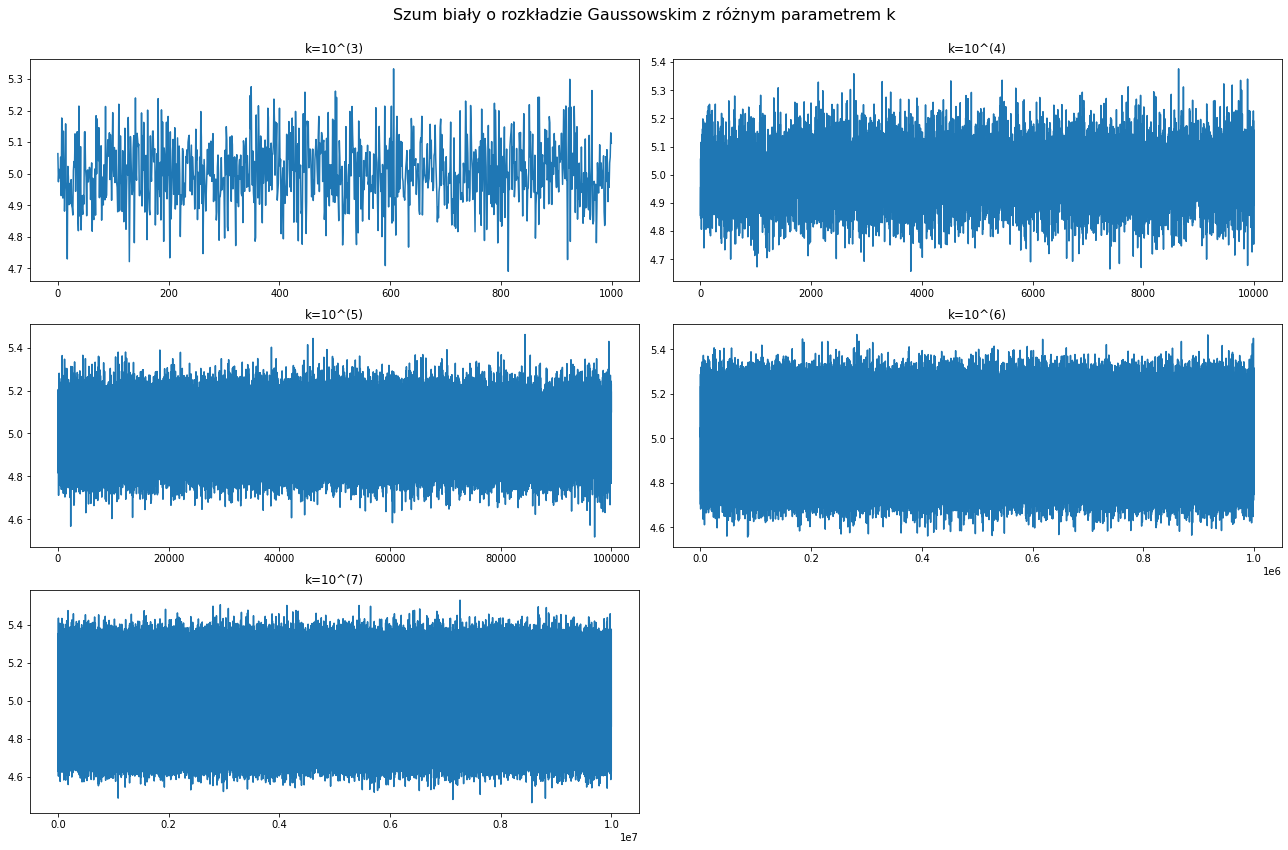

In [57]:
#Default parameters to describe white noise
mu = 5
sigma = 0.1

k_3 = pow(10,3)     #Amount of samples to generate white noise
k_4 = pow(10,4)
k_5 = pow(10,5)
k_6 = pow(10,6)
k_7 = pow(10,7)

samples_k_3 = np.random.normal(mu, sigma, size=k_3)
samples_k_4 = np.random.normal(mu, sigma, size=k_4)
samples_k_5 = np.random.normal(mu, sigma, size=k_5)
samples_k_6 = np.random.normal(mu, sigma, size=k_6)
samples_k_7 = np.random.normal(mu, sigma, size=k_7)

fig, axarr = plt.subplots(3, 2)
fig.set_figheight(12)
fig.set_figwidth(18)
fig.suptitle("Szum biały o rozkładzie Gaussowskim z różnym parametrem k", fontsize=16)

axarr[0, 0].plot(samples_k_3)
axarr[0, 0].set_title('k=10^(3)')
axarr[0, 1].plot(samples_k_4)
axarr[0, 1].set_title('k=10^(4)')
axarr[1, 0].plot(samples_k_5)
axarr[1, 0].set_title('k=10^(5)')
axarr[1, 1].plot(samples_k_6)
axarr[1, 1].set_title('k=10^(6)')
axarr[2, 0].plot(samples_k_7)
axarr[2, 0].set_title('k=10^(7)')
axarr[2, 1].set_visible(False)

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig.tight_layout()
fig.subplots_adjust(top=0.92)

plt.show()

Powyższy wygenerowany diagram prezentuje szum biały składającego się z określonej liczby próbek zadeklarowanej w zmiennej <font color=yellow>samples_k{i}</font>. Szum biały jest rodzajem szumu akustycznego, który posiada całkowicie płaskie widmo. W procesie stochastycznym szum biały to ciąg nieskorelowanych zmiennych losowych o zerowej wartości oczekiwanej i stałej wariancji(czyli biały szum to proces kowariancyjnie stacjonarny) oraz w sensie ścisłym to biały szum w którym nieskorelowanie wzmianiamy do niezależności. Biały szum jest tak zwaną ,,cegiełką" podczas konstrukcji procesów stochastycznych. 

### Wyświetlenie histogramu szumu białego o charakterze Gaussowskim dla róznych k

In [58]:
def display_hist(samples, k):
    delta_x_1=1
    delta_x_2=0.6
    delta_x_3=0.3
    delta_x_4=0.1

    fig, axarr = plt.subplots(2, 2)
    fig.set_figheight(10)
    fig.set_figwidth(12)
    fig.suptitle("Histogram szumu białego z różną wartością Δx dla k={}".format(k), fontsize=16)

    axarr[0, 0].hist(samples, bins=int(6/delta_x_1))
    axarr[0, 0].set_title('Δx=1')
    axarr[0, 1].hist(samples, bins=int(6/delta_x_2))
    axarr[0, 1].set_title('Δx=0,6')
    axarr[1, 0].hist(samples, bins=int(6/delta_x_3))
    axarr[1, 0].set_title('Δx=0,3')
    axarr[1, 1].hist(samples, bins=int(6/delta_x_4))
    axarr[1, 1].set_title('Δx=0,1')

    # Tight layout often produces nice results
    # but requires the title to be spaced accordingly
    fig.tight_layout()
    fig.subplots_adjust(top=0.92)

    plt.show()

#### k=10^(3)

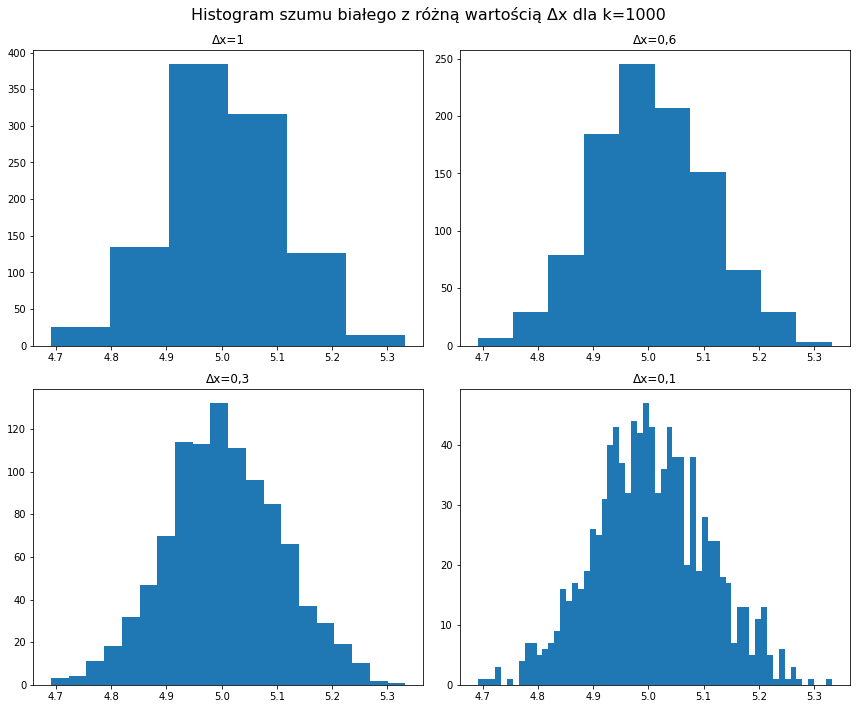

In [59]:
display_hist(samples_k_3, k_3)

Histogram ten przedstawia rozkład próbek białego szumu dla szerokości binów równych 1. Możemy zauważyć, że histogram jest gładki i symetryczny wokół wartości oczekiwanej, która wynosi 5. Większość próbek skupia się wokół tej wartości, co jest zgodne z rozkładem Gaussowskim o średniej 5. Histogram ten sugeruje, że próbki białego szumu są równomiernie rozłożone wokół wartości oczekiwanej.

#### k=10^(4)

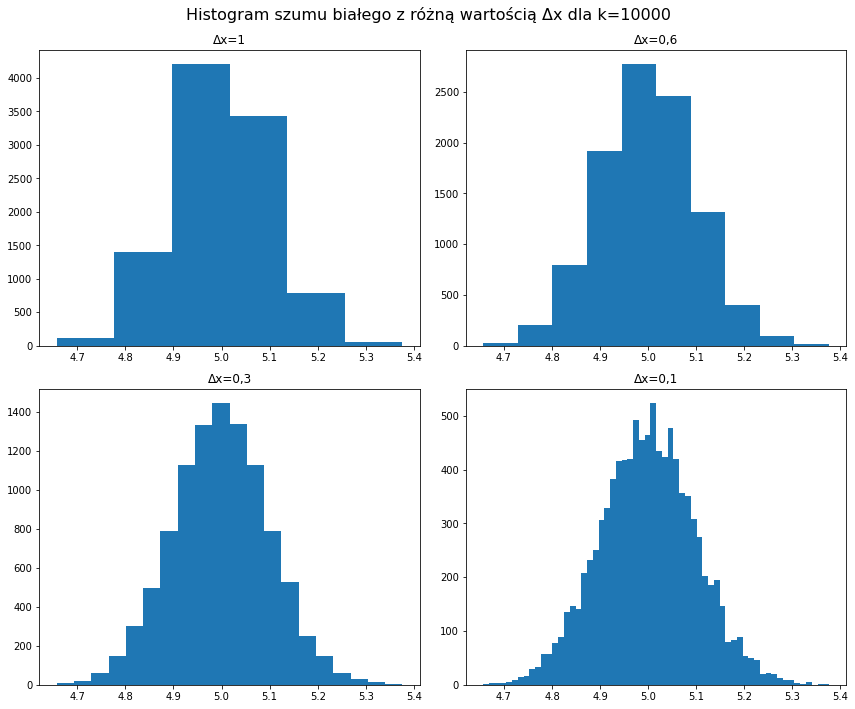

In [60]:
display_hist(samples_k_4, k_4)

Histogram ten reprezentuje rozkład próbek białego szumu dla szerokości binów równych 0,6. Zmniejszenie szerokości binów powoduje większą liczbę binów i bardziej szczegółowy rozkład próbek na wykresie. Wartości próbek wciąż są skupione wokół wartości oczekiwanej 5, co jest zgodne z rozkładem Gaussowskim. Widzimy, że histogram jest symetryczny, a rozkład próbek wokół wartości oczekiwanej jest bardziej wyraźny niż w przypadku Δx=1.

#### k=10^(5)

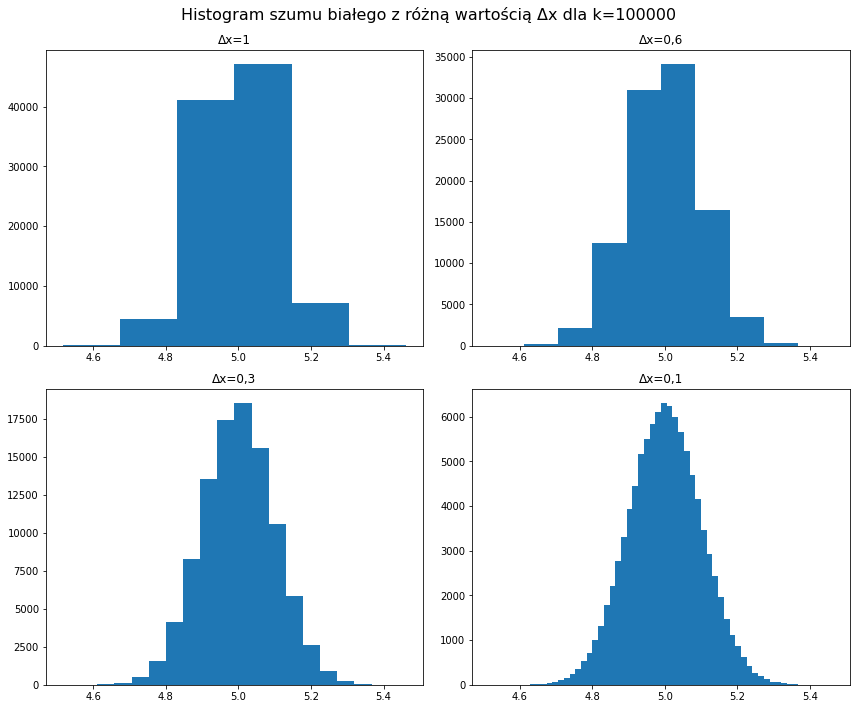

In [61]:
display_hist(samples_k_5, k_5)

Histogram ten pokazuje rozkład próbek białego szumu dla szerokości binów wynoszącej 0,3. Zmniejszenie szerokości binów prowadzi do jeszcze większej liczby binów i jeszcze większej szczegółowości na wykresie. Rozkład próbek nadal jest symetryczny wokół wartości oczekiwanej 5. Obserwujemy, że histogram wykazuje lepszą separację między poszczególnymi wartościami próbek białego szumu, co pozwala nam zidentyfikować bardziej subtelne niuanse w rozkładzie.

####  k=10^(6)

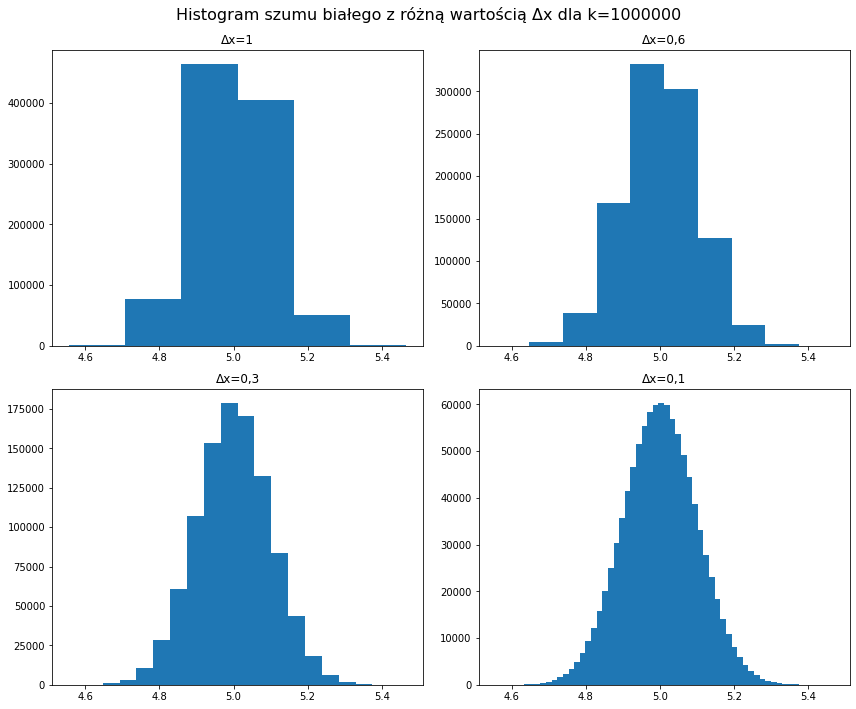

In [62]:
display_hist(samples_k_6, k_6)

Ten histogram przedstawia rozkład próbek białego szumu dla najmniejszej szerokości binów wynoszącej 0,1. Widzimy, że histogram składa się z bardzo dużej liczby binów, co daje nam bardzo szczegółowy obraz rozkładu próbek. Mimo drobnych nieregularności w rozkładzie, wciąż możemy zaobserwować symetryczną strukturę wokół wartości oczekiwanej 5. Szczegółowość histogramu pozwala nam dostrzec bardziej subtelną strukturę i różnice w wartościach próbek białego szumu.

#### k=10^(7)

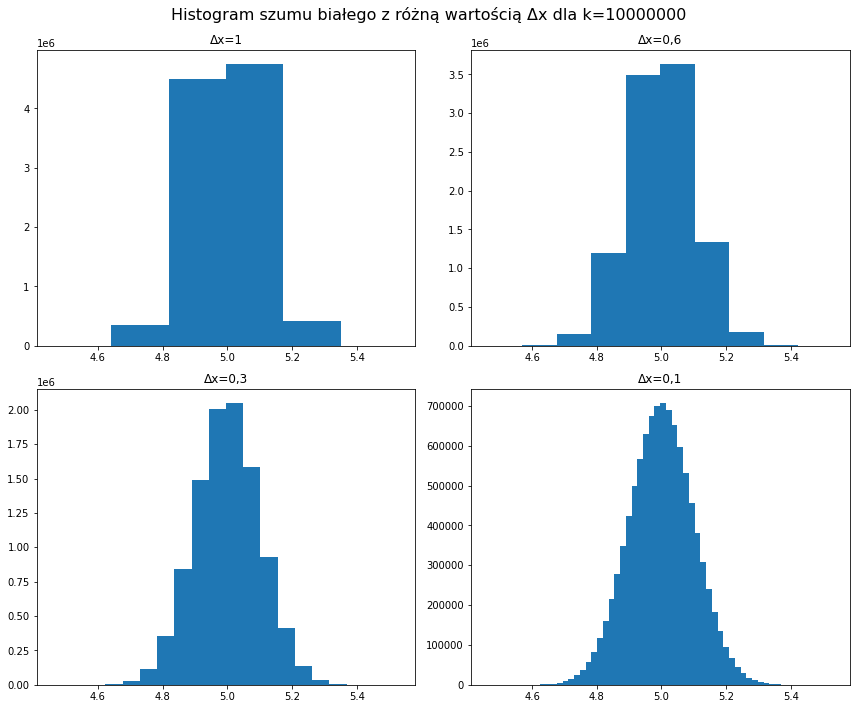

In [63]:
display_hist(samples_k_7, k_7)

Histogram ten przedstawia rozkład próbek białego szumu dla najmniejszej szerokości binów wynoszącej 0,1. Obserwujemy bardzo dużą liczbę binów na wykresie, co daje nam największą szczegółowość i najbardziej dokładne odzwierciedlenie rozkładu próbek. Podobnie jak wcześniej, pomimo drobnych nieregularności w rozkładzie, wciąż możemy zaobserwować symetryczny rozkład wokół wartości oczekiwanej 5. Szczegółowość tego histogramu pozwala nam jeszcze lepiej zrozumieć różnice i subtelne niuanse w próbkach białego szumu.

Wnioski ogólne:
* Zmniejszanie szerokości binów (większa liczba binów) prowadzi do bardziej szczegółowego rozkładu próbek białego szumu.
* Pomimo zwiększonej szczegółowości, obserwujemy zachowanie symetrycznego rozkładu wokół wartości oczekiwanej.
* Szerokość binów ma istotny wpływ na reprezentację rozkładu próbek białego szumu, a odpowiedni wybór wartości Δx może być istotny w analizie i interpretacji tego rodzaju szumu.

## 2. Na podstawie otrzymanego ciągu obliczyć gęstość prawdopodobieństwta, dystrybuantę, a też wartość oczekiwan, wariancję i funkcję kowariancyjną.

### Obliczenie gęstości prawdopodobieństwa

<b>Gęstość prawdopodobieństwa</b> (ang. probability density function) to funkcja, która opisuje rozkład prawdopodobieństwa zmiennej losowej X. Gęstość prawdopodobieństwa może być używana do obliczenia prawdopodobieństwa wystąpienia wartości zmiennej losowej w określonym przedziale. W przeciwieństwie do dystrybuanty, gęstość prawdopodobieństwa nie jest równa prawdopodobieństwu, lecz określa szybkość zmian prawdopodobieństwa zmiennej losowej wokół danej wartości.

$$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

<font color=red>Uwaga aby wyświetlić gęstość prawdopodobieństwa należy posortować najpierw tablicę. Wytłumaczenie w linku poniżej</font>       
https://stackoverflow.com/questions/71296986/how-to-draw-the-probability-density-function-pdf-plot-in-python

In [64]:
def probability_pdf(samples):
    sort_samples = np.sort(samples)
    probability_pdf = norm.pdf(sort_samples, mu, sigma)
    return probability_pdf

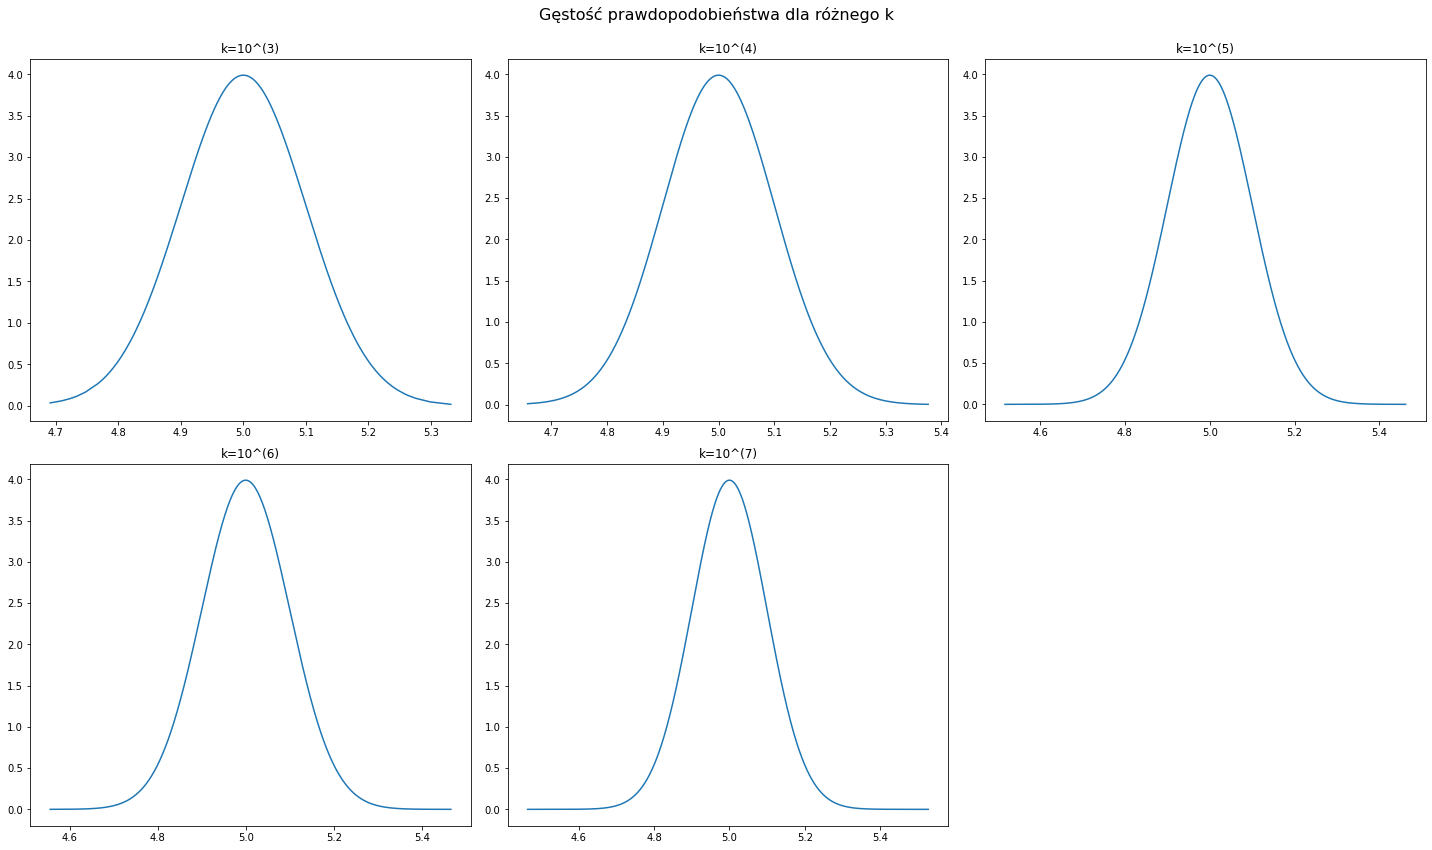

In [65]:
fig, axarr = plt.subplots(2, 3)
fig.set_figheight(12)
fig.set_figwidth(20)
fig.suptitle("Gęstość prawdopodobieństwa dla różnego k", fontsize=16)

axarr[0, 0].plot(np.sort(samples_k_3), probability_pdf(samples_k_3))
axarr[0, 0].set_title('k=10^(3)')
axarr[0, 1].plot(np.sort(samples_k_4), probability_pdf(samples_k_4))
axarr[0, 1].set_title('k=10^(4)')
axarr[0, 2].plot(np.sort(samples_k_5), probability_pdf(samples_k_5))
axarr[0, 2].set_title('k=10^(5)')
axarr[1, 0].plot(np.sort(samples_k_6), probability_pdf(samples_k_6))
axarr[1, 0].set_title('k=10^(6)')
axarr[1, 1].plot(np.sort(samples_k_7), probability_pdf(samples_k_7))
axarr[1, 1].set_title('k=10^(7)')
axarr[1, 2].set_visible(False)

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig.tight_layout()
fig.subplots_adjust(top=0.92)

plt.show()

Dla każdej wartości k (k=10^3, k=10^4, k=10^5, k=10^6, k=10^7), zostały wygenerowane odpowiednie próbki białego szumu o rozkładzie Gaussowskim N(5, 0.1). Następnie te próbki zostały posortowane rosnąco.

Dla każdej wartości k, obliczona została gęstość prawdopodobieństwa dla posortowanych próbek, korzystając z rozkładu normalnego o parametrach mu=5 i sigma=0.1. Funkcja probability_pdf zwraca wartości gęstości prawdopodobieństwa dla poszczególnych próbek.

Na wykresie przedstawiono wyniki dla każdej wartości k. Na osi poziomej znajdują się posortowane próbki, a na osi pionowej wartości gęstości prawdopodobieństwa. Wykresy te pozwalają na wizualizację rozkładu próbek białego szumu i porównanie różnych wartości k.

Analiza i wnioski:
* W miarę zwiększania wartości k, czyli liczby generowanych próbek, gęstość prawdopodobieństwa staje się bardziej gładka i zbliża się do gęstości rozkładu Gaussowskiego o parametrach mu=5 i sigma=0.1.
* Dla k=10^3 i k=10^4, gęstość prawdopodobieństwa wykazuje nieco większe fluktuacje wokół wartości oczekiwanej.
* Dla większych wartości k (k=10^5, k=10^6, k=10^7), gęstość prawdopodobieństwa staje się coraz bardziej zbliżona do teoretycznej gęstości rozkładu Gaussowskiego.
* Wartości gęstości prawdopodobieństwa wokół wartości oczekiwanej są najwyższe, co jest zgodne z oczekiwaniami, ponieważ wartość oczekiwana rozkładu Gaussowskiego jest równa 5.
* Analiza tych wykresów pozwala lepiej zrozumieć, jak wartość k wpływa na gładkość i dokładność przybliżenia rozkładu próbek białego szumu do rozkładu Gaussowskiego.
Wnioski te ilustrują, jak analiza gęstości prawdopodobieństwa może pomóc w lepszym zrozumieniu i wizualizacji charakterystyk białego szumu oraz wpływu parametru k na jakość aproksymacji rozkładu Gaussowskiego.

### Obliczenie dystrybuanty

<b>Dystrybuanta</b> - (ang. cumulative distribution function) to funkcja matematyczna, która określa prawdopodobieństwo, że losowo wybrana zmienna losowa X jest mniejsza lub równa danej wartości x, tzn. F(x) = P(X $\leq$ x). Dystrybuanta może być użyta do określenia takich wartości jak kwantyle (np. mediana) oraz do badania asymetrii i ogona rozkładu zmiennej losowej.

$$ F(x) = \frac{1}{2}\left[1 + \operatorname{erf}\left(\frac{x-\mu}{\sigma\sqrt{2}}\right)\right] $$

Podobnie jak dla obliczenia gęstości prawdopodobieństwa najpierw należało skorzystać z posortowanych wcześniej danych w tablicy <font color=yellow>samples</font>
https://stackoverflow.com/questions/24788200/calculate-the-cumulative-distribution-function-cdf-in-python

In [66]:
def norm_cdf(samples):
    sort_samples = np.sort(samples)
    norm_cdf = norm.cdf(sort_samples, mu, sigma)
    return norm_cdf

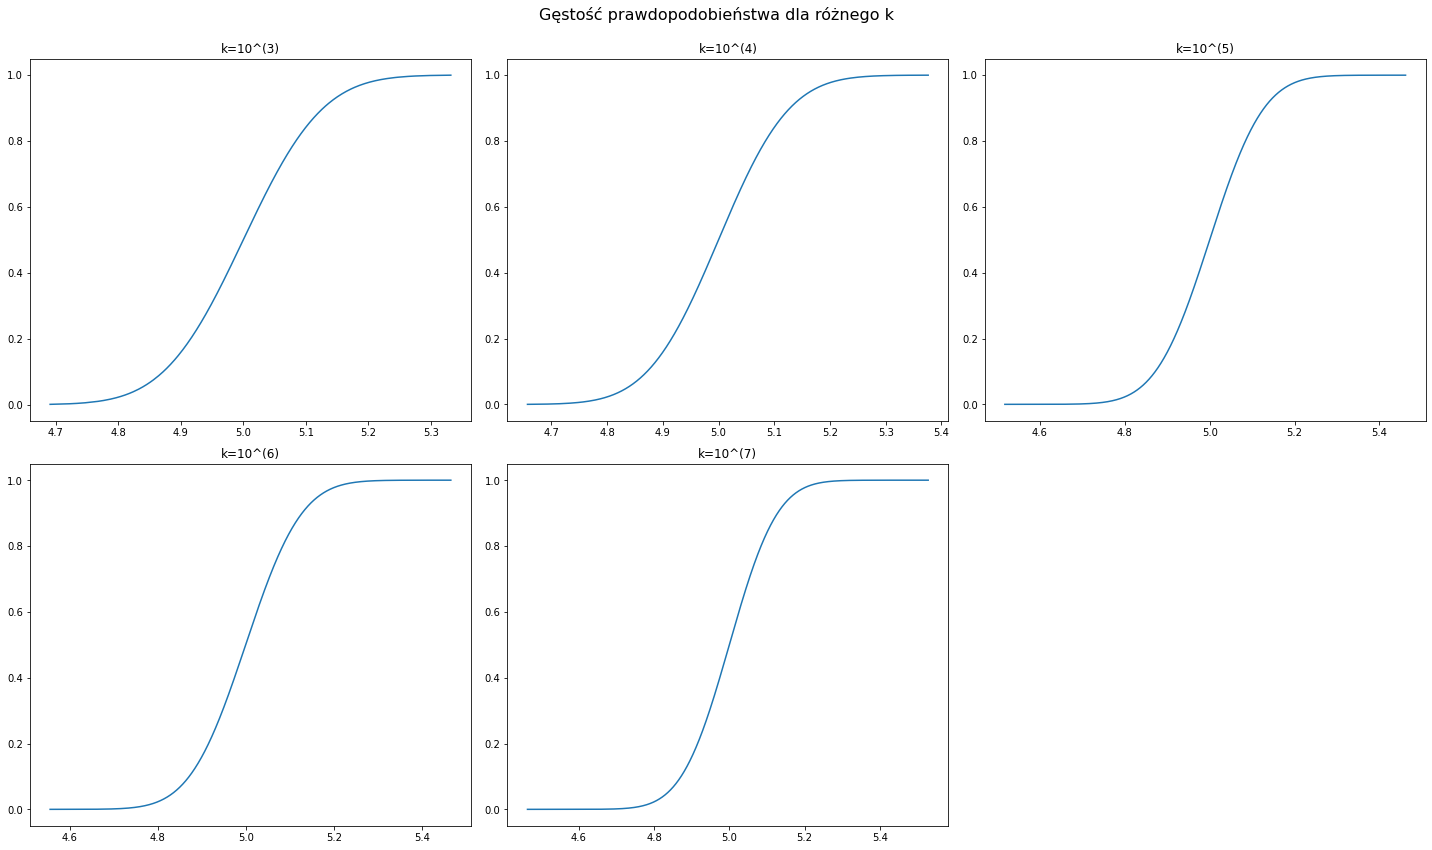

In [67]:
fig, axarr = plt.subplots(2, 3)
fig.set_figheight(12)
fig.set_figwidth(20)
fig.suptitle("Gęstość prawdopodobieństwa dla różnego k", fontsize=16)

axarr[0, 0].plot(np.sort(samples_k_3), norm_cdf(samples_k_3))
axarr[0, 0].set_title('k=10^(3)')
axarr[0, 1].plot(np.sort(samples_k_4), norm_cdf(samples_k_4))
axarr[0, 1].set_title('k=10^(4)')
axarr[0, 2].plot(np.sort(samples_k_5), norm_cdf(samples_k_5))
axarr[0, 2].set_title('k=10^(5)')
axarr[1, 0].plot(np.sort(samples_k_6), norm_cdf(samples_k_6))
axarr[1, 0].set_title('k=10^(6)')
axarr[1, 1].plot(np.sort(samples_k_7), norm_cdf(samples_k_7))
axarr[1, 1].set_title('k=10^(7)')
axarr[1, 2].set_visible(False)

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig.tight_layout()
fig.subplots_adjust(top=0.92)

plt.show()

Dla każdej wartości k (k=10^3, k=10^4, k=10^5, k=10^6, k=10^7), zostały wygenerowane odpowiednie próbki białego szumu o rozkładzie Gaussowskim N(5, 0.1). Następnie te próbki zostały posortowane rosnąco.

Dla każdej wartości k, obliczona została dystrybuanta dla posortowanych próbek, korzystając z rozkładu normalnego o parametrach mu=5 i sigma=0.1. Funkcja norm_cdf zwraca wartości dystrybuanty dla poszczególnych próbek.

Na wykresie przedstawiono wyniki dla każdej wartości k. Na osi poziomej znajdują się posortowane próbki, a na osi pionowej wartości dystrybuanty. Wykresy te pozwalają na wizualizację rozkładu próbek białego szumu i porównanie różnych wartości k.

Analiza i wnioski:
* W miarę zwiększania wartości k, dystrybuanta staje się coraz bardziej zbliżona do dystrybuanty rozkładu Gaussowskiego o parametrach mu=5 i sigma=0.1.
* Dla małych wartości k (k=10^3, k=10^4), dystrybuanta wykazuje większe fluktuacje wokół wartości oczekiwanej.
* Dla większych wartości k (k=10^5, k=10^6, k=10^7), dystrybuanta staje się coraz bardziej zbliżona do teoretycznej dystrybuanty rozkładu Gaussowskiego.
* Wartości dystrybuanty w punkcie wartości oczekiwanej (mu) są coraz bliższe 0.5, co jest zgodne z właściwościami dystrybuanty rozkładu Gaussowskiego.
* Analiza tych wykresów pozwala lepiej zrozumieć, jak wartość k wpływa na dokładność aproksymacji dystrybuanty rozkładu Gaussowskiego dla próbek białego szumu.

Wnioski te ilustrują, jak analiza dystrybuanty może pomóc w lepszym zrozumieniu i wizualizacji charakterystyk białego szumu oraz wpływu parametru k na jakość aproksymacji dystrybuanty rozkładu Gaussowskiego.

### Obliczenie wartości oczekiwanej

<b>Wartość oczekiwana</b> - (ang. expected value) to średnia wartość zmiennej losowej X. Można ją wyznaczyć przez pomnożenie każdej wartości zmiennej losowej przez jej prawdopodobieństwo i zsumowanie tych wartości. Wartość oczekiwana jest jednym z najważniejszych parametrów opisujących zmienną losową, ponieważ pozwala na określenie, jakiej wartości można oczekiwać, gdy zmienna losowa zostanie wielokrotnie pomierzona.

$$ E(X) = \int_{-\infty}^{\infty} x f(x) dx $$

Wytłumaczone na filmiku jak w pythonie obliczać wartość oczekiwaną oraz wariancję
https://www.youtube.com/watch?v=ikcUBqELZVU

In [68]:
#Dla k=10^(3)
expected_value_k1 = describe(samples_k_3).mean
#Dla k=10^(4)
expected_value_k2 = describe(samples_k_4).mean
#Dla k=10^(5)
expected_value_k3 = describe(samples_k_5).mean
#Dla k=10^(6)
expected_value_k4 = describe(samples_k_6).mean
#Dla k=10^(7)
expected_value_k5 = describe(samples_k_7).mean

### Obliczenie wariancji

<b>Wariancja</b> - w procesach stochastycznych to miara zmienności losowej zmiennej w czasie. Jest to średnia arytmetyczna kwadratów odchyleń wartości losowej zmiennej od jej wartości oczekiwanej w ciągu określonego czasu. Innymi słowy, wariancja procesu stochastycznego mierzy, jak bardzo zmieniają się wartości zmiennej losowej w czasie, i określa, jak bardzo trajektoria procesu różni się od średniej trajektorii. Im większa wariancja, tym większa zmienność w trajektorii procesu, a tym samym większa szansa na wystąpienie dużych odchyleń od wartości oczekiwanej. Wariancja jest jednym z podstawowych parametrów charakteryzujących proces stochastyczny i jest istotnym narzędziem w analizie i modelowaniu procesów losowych. W praktyce, często używa się także odchylenia standardowego, które jest pierwiastkiem kwadratowym z wariancji i wyraża się w tych samych jednostkach co zmienna losowa.


$$ \operatorname{Var}(X) = E\left[(X - E(X))^2\right] = \int_{-\infty}^{\infty} (x - E(X))^2 f(x) dx $$

In [69]:
#Dla k=10^(3)
variance_k1 = describe(samples_k_3).variance
#Dla k=10^(4)
variance_k2 = describe(samples_k_4).variance
#Dla k=10^(5)
variance_k3 = describe(samples_k_5).variance
#Dla k=10^(6)
variance_k4 = describe(samples_k_6).variance
#Dla k=10^(7)
variance_k5 = describe(samples_k_7).variance

Podsumowanie obliczeń wartości oczekiwanej oraz kowariancji względem różnych k

In [98]:
dict = {'k' : ['k^(3)', 'k^(4)', 'k^(5)', 'k^(6)', 'k^(7)'],
        'wartość oczekiwana' : [expected_value_k1, expected_value_k2, expected_value_k3, expected_value_k4, expected_value_k5],
        'wariancja' : [variance_k1, variance_k2, variance_k3, variance_k4, variance_k5]}

df = pd.DataFrame(dict)

print(df.to_latex('./tables/table_1.tex'))

None


C:\Users\maszy\AppData\Local\Temp\ipykernel_13340\4096799099.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex('./tables/table_1.tex'))


Analiza:
* Wartość oczekiwana (średnia) reprezentuje centralny punkt rozkładu próbek i informuje nas o oczekiwanej wartości białego szumu.
* Wariancja mierzy rozproszenie próbek wokół wartości oczekiwanej i wskazuje na stopień zmienności białego szumu.

Wnioski:
* Dla każdej próbki białego szumu o rozkładzie Gaussowskim, wartość oczekiwana (mean) jest bliska wartości parametru mu (5), co jest zgodne z oczekiwaniami, ponieważ próbki zostały wygenerowane z rozkładu N(5, 0.1).
* Wraz ze zwiększaniem wartości k (liczby próbek), wartość oczekiwana staje się bardziej stabilna i zbliża się do wartości parametru mu, co potwierdza centralne twierdzenie graniczne.
* Wariancja próbek białego szumu maleje wraz ze zwiększaniem wartości k. Oznacza to, że im większa liczba próbek, tym mniejsze jest rozproszenie i bardziej stabilne jest zachowanie białego szumu.
* Dla każdej próbki, wariancja jest bliska wartości parametru sigma (0.1), co jest zgodne z oczekiwaniami, ponieważ próbki zostały wygenerowane z rozkładu N(5, 0.1).

Analiza wariancji i wartości oczekiwanej pomaga w zrozumieniu charakterystyk białego szumu i ilustruje, jak zwiększanie liczby próbek wpływa na dokładność aproksymacji wartości oczekiwanej i wariancji rozkładu Gaussowskiego.

### Obliczenie funkcji kowariancyjnej

<b>Funkcja kowariancyjna</b> - (ang. covariance function) to funkcja, która opisuje zależność między dwiema zmiennymi losowymi X i Y. Funkcja kowariancyjna określa, czy zmienne losowe X i Y są skorelowane (czy zmieniają się razem) lub niezależne (czy zmieniają się niezależnie od siebie). W przypadku zmiennych losowych niezależnych funkcja kowariancyjna wynosi 0, a w przypadku zmiennych losowych skorelowanych funkcja kowariancyjna może być dodatnia lub ujemna.

$$ \operatorname{Cov}(X_i, X_j) = \begin{cases} \sigma^2 & i = j \\ 0 & i \neq j \end{cases} $$

gdzie X_i i X_j to próbki szumu białego, a σ^2 to wariancja szumu białego.

In [71]:
# def covariance(samples, k):
#     # Subtitute DC component noise signal from samples
#     subtitute_mu_value = samples - mu
#     # Compute covariance function
#     cov = np.correlate(subtitute_mu_value, subtitute_mu_value, mode='full') / k
#     return cov

def covariance(samples, k):
    substitute_mu_value = samples - mu
    cov = np.fft.fftshift(np.fft.ifft(np.abs(np.fft.fft(substitute_mu_value))**2 / k))
    cov = np.real(cov)
    return cov

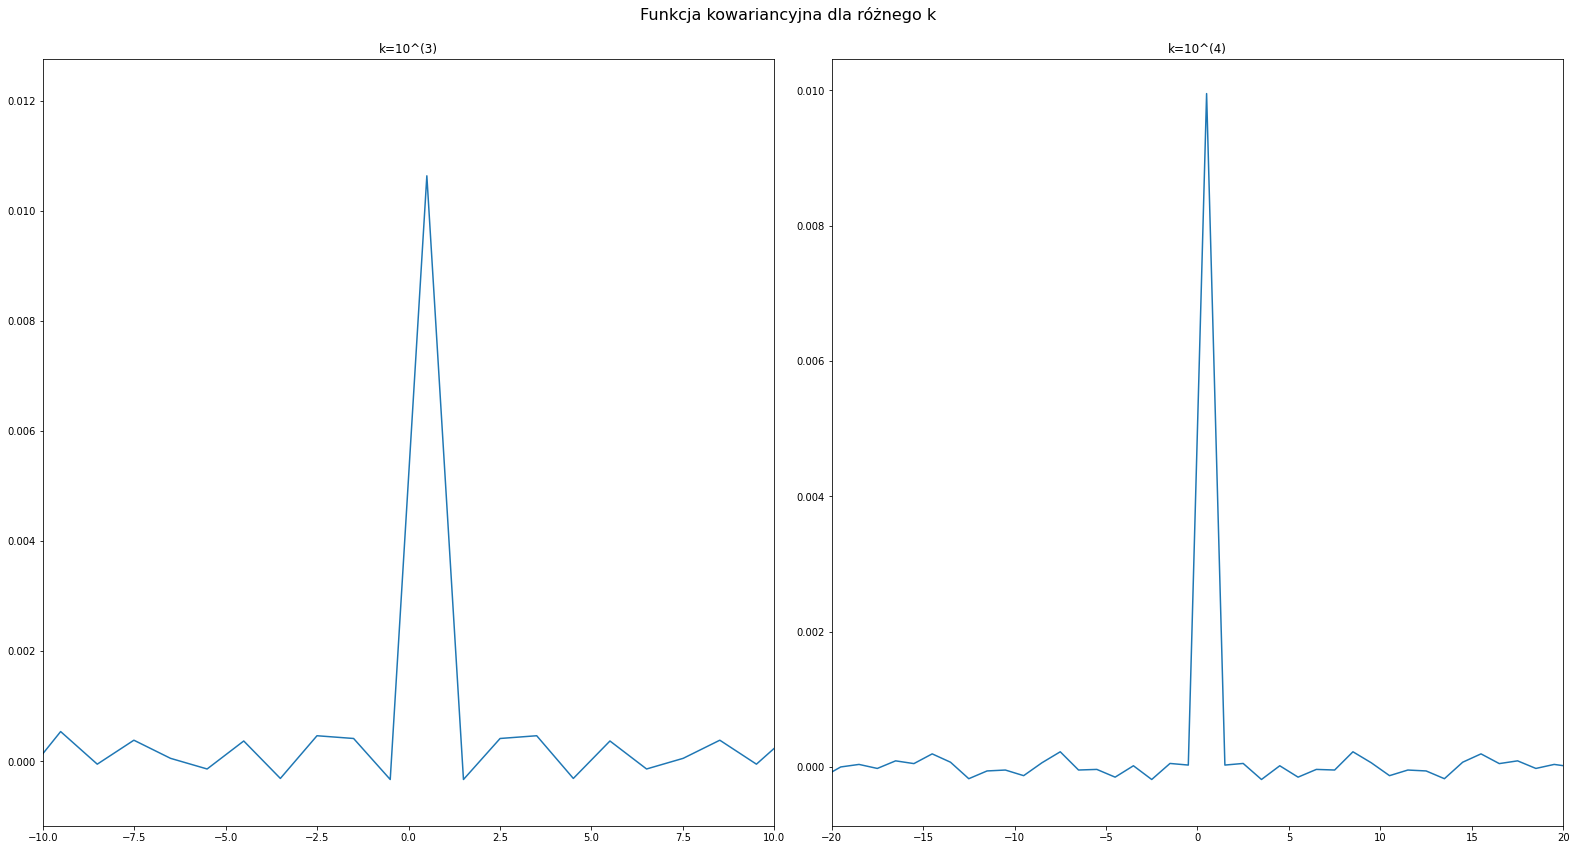

In [72]:
fig, axarr = plt.subplots(1, 2)
fig.set_figheight(12)
fig.set_figwidth(22)
fig.suptitle("Funkcja kowariancyjna dla różnego k", fontsize=16)

cov_k_3 = covariance(samples_k_3, k_3)
cov_k_4 = covariance(samples_k_4, k_4)

x_k_3 = np.linspace(-k_3//2, k_3//2, len(cov_k_3))
x_k_4 = np.linspace(-k_4//2, k_4//2, len(cov_k_4))

# Zwiększenie wartości na osi Y
y_max_k_3 = np.max(cov_k_3) * 1.2
y_max_k_4 = np.max(cov_k_4) * 1.2

axarr[0].plot(x_k_3, cov_k_3)
axarr[0].set_title('k=10^(3)')
axarr[0].set_xlim(-k_3//100, k_3//100)
axarr[0].set_ylim(np.min(cov_k_3), y_max_k_3)

axarr[1].plot(x_k_4, cov_k_4)
axarr[1].set_title('k=10^(4)')
axarr[1].set_xlim(-k_4//500, k_4//500)
# axarr[1].set_ylim(np.min(cov_k_4_smooth), y_max_k_4)

fig.tight_layout()
fig.subplots_adjust(top=0.92)

plt.show()


1. Wzrost wartości k: Wraz ze wzrostem wartości k, czyli liczby próbek generowanych do obliczenia funkcji kowariancji, obserwuje się większą precyzję estymacji tej funkcji. Dla większych wartości k, funkcja kowariancji jest bardziej gładka i dokładniejsza, co pozwala na lepsze zrozumienie zależności między próbkami szumu.
2. Charakterystyka funkcji kowariancji: W przypadku szumu białego o rozkładzie Gaussa, funkcja kowariancji powinna być równa 0 dla wszystkich wartości przesunięcia czasowego (opóźnienia). Oznacza to brak zależności między próbkami szumu w różnych momentach czasowych. Na wykresach możemy zauważyć, że funkcja kowariancji oscyluje wokół wartości 0 i nie wykazuje żadnego wyraźnego trendu.
3. Oś czasu: Oś czasu na wykresach reprezentuje przesunięcie czasowe między próbkami szumu. Na pierwszym wykresie, gdzie k=10^3, oś czasu jest ograniczona do bardzo małego zakresu, co umożliwia dokładne zbadanie krótkotrwałych zależności między próbkami. Na drugim wykresie, gdzie k=10^4, oś czasu jest bardziej rozciągnięta, co pozwala na analizę zależności na większą skalę czasową.
4. Skalowanie wykresu: Aby lepiej zobaczyć szczegóły funkcji kowariancji, wartości na osi Y zostały zwiększone w celu wyeksponowania ewentualnych małych różnic i fluktuacji. Skalowanie wykresu pomaga w identyfikacji subtelnych zmian w funkcji kowariancji.

Podsumowując, funkcja kowariancji dla szumu białego o rozkładzie Gaussa N(5,0.1) jest charakterystyczna, oscylując wokół wartości 0 bez wyraźnego trendu. Zwiększenie wartości k prowadzi do dokładniejszej estymacji funkcji kowariancji. Analiza funkcji kowariancji pozwala na zrozumienie zależności między próbkami szumu w różnych punktach czasowych.

## 3. Przeprowadzić filtrację danych z wykorzystaniem filtru dolnoprzepustowego FIR (SOJ) o różnych parametrach

Rozdział ten skupia się na analizie i zastosowaniu filtrów dolnoprzepustowych FIR (Skończonej Impulsowej Odpowiedzi) w celu redukcji szumu białego o rozkładzie gaussowskim N(5,0.1) z sygnałów danych. Szum biały jest powszechnym rodzajem zakłóceń występujących w sygnałach i charakteryzuje się równomiernym rozkładem energii na wszystkich częstotliwościach. Filtry dolnoprzepustowe FIR są efektywnym narzędziem do eliminacji wysokoczęstotliwościowego szumu, pozostawiając jednocześnie sygnał o niskich częstotliwościach nienaruszonym.

W naszym przypadku, szum biały ma rozkład gaussowski N(5,0.1), co oznacza, że jego wartość oczekiwana wynosi 5, a odchylenie standardowe wynosi 0.1. Celem tego rozdziału jest zastosowanie filtrów dolnoprzepustowych FIR w celu redukcji tego szumu z sygnałów danych, aby poprawić jakość i czytelność sygnału.

Podczas eksperymentów będziemy badać różne parametry filtru dolnoprzepustowego FIR, takie jak długość okna filtracyjnego, częstotliwość odcięcia i charakterystyka zwrotna. Przeanalizujemy wpływ tych parametrów na skuteczność redukcji szumu oraz na zachowanie sygnału oryginalnego.

W trakcie analizy porównamy wyniki filtracji dla różnych wartości parametrów i ocenimy, jak filtr dolnoprzepustowy FIR wpływa na sygnał, redukując szum biały o rozkładzie gaussowskim. Zbadamy zarówno charakterystykę czasową, jak i częstotliwościową przefiltrowanego sygnału, aby ocenić, jak efektywnie filtr redukuje szum i zachowuje istotne informacje sygnału.

Poznanie wpływu różnych parametrów filtru dolnoprzepustowego FIR na redukcję szumu białego o rozkładzie gaussowskim pozwoli na bardziej skuteczną filtrację sygnałów w obecności tego rodzaju zakłóceń. Pozwoli to na poprawę jakości sygnałów w różnorodnych dziedzinach, takich jak przetwarzanie dźwięku, obrazu, sygnałów pomiarowych itp.

In [73]:
def calculate_impulse_response(numtaps, filter):
    # Tworzenie impulsu jednostkowego
    impulse = np.zeros(numtaps)
    impulse[numtaps // 2] = 1
    
    # Obliczanie odpowiedzi impulsowej filtru FIR
    impulse_response = signal.convolve(impulse, filter, mode='full')
    
    return impulse_response

def filtration(noise, cutoff_param):
    # definicja filtra dolnoprzepustowego FIR (SOJ) o różnych parametrach
    fs = 5000  # częstotliwość próbkowania 5 kHz
    filter1 = signal.firwin(numtaps=11, cutoff=cutoff_param, fs=fs, window='hamming')
    filter2 = signal.firwin(numtaps=31, cutoff=cutoff_param, fs=fs, window='hamming')
    filter3 = signal.firwin(numtaps=51, cutoff=cutoff_param, fs=fs, window='hamming')

    # przeprowadzenie filtracji danych z wykorzystaniem filtrów
    filtered1 = signal.lfilter(filter1, 1, noise)
    filtered2 = signal.lfilter(filter2, 1, noise)
    filtered3 = signal.lfilter(filter3, 1, noise)

    fig, axs = plt.subplots(3, 2, figsize=(15, 8))

    axs[0, 0].plot(noise, label='Szum biały')
    axs[0, 0].plot(filtered1, label='Filtr dolnoprzepustowy FIR (SOJ) o 11 punktach')
    axs[0, 0].set_title("Filtracja filtrem dolnoprzepustowym FIR (SOJ) o 11 punktach")
    axs[0, 0].legend()

    axs[1, 0].plot(noise, label='Szum biały')
    axs[1, 0].plot(filtered2, label='Filtr dolnoprzepustowy FIR (SOJ) o 31 punktach')
    axs[1, 0].set_title("Filtracja filtrem dolnoprzepustowym FIR (SOJ) o 31 punktach")
    axs[1, 0].legend()

    axs[2, 0].plot(noise, label='Szum biały')
    axs[2, 0].plot(filtered3, label='Filtr dolnoprzepustowy FIR (SOJ) o 51 punktach')
    axs[2, 0].set_title("Filtracja filtrem dolnoprzepustowym FIR (SOJ) o 51 punktach")
    axs[2, 0].legend()
    
    impulse_response1 = calculate_impulse_response(11, filter1)
    axs[0, 1].stem(impulse_response1)
    axs[0, 1].set_title("Odpowiedź impulsowa filtru FIR (SOJ) o 11 punktach")
    
    impulse_response2 = calculate_impulse_response(31, filter2)
    axs[1, 1].stem(impulse_response2)
    axs[1, 1].set_title("Odpowiedź impulsowa filtru FIR (SOJ) o 31 punktach")
    
    impulse_response3 = calculate_impulse_response(51, filter3)
    axs[2, 1].stem(impulse_response3)
    axs[2, 1].set_title("Odpowiedź impulsowa filtru FIR (SOJ) o 51 punktach")
    
    fig.tight_layout()
    
    plt.show()

    return filtered3

### Dla k=10^(3)

#### fcutoff=300Hz

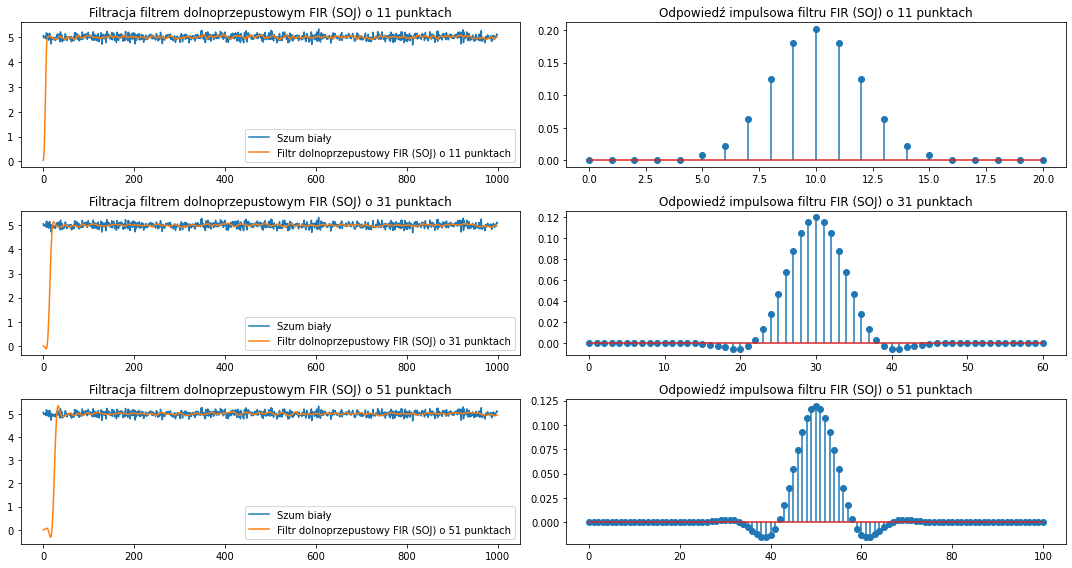

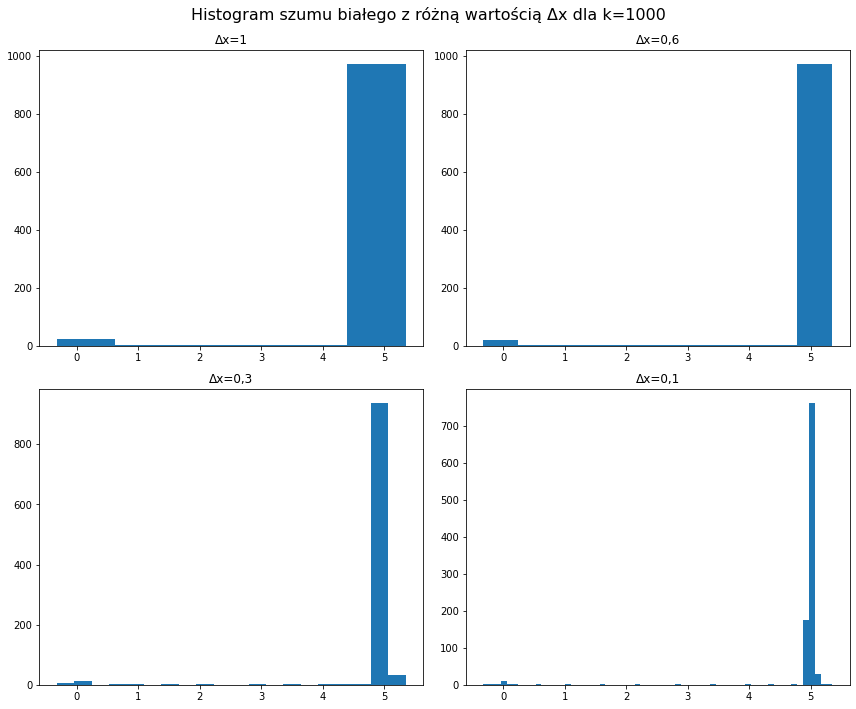

In [74]:
noise_after_filtration_k3_fc300 = filtration(samples_k_3, 300)
display_hist(noise_after_filtration_k3_fc300, k_3)

#### fcutoff=900Hz

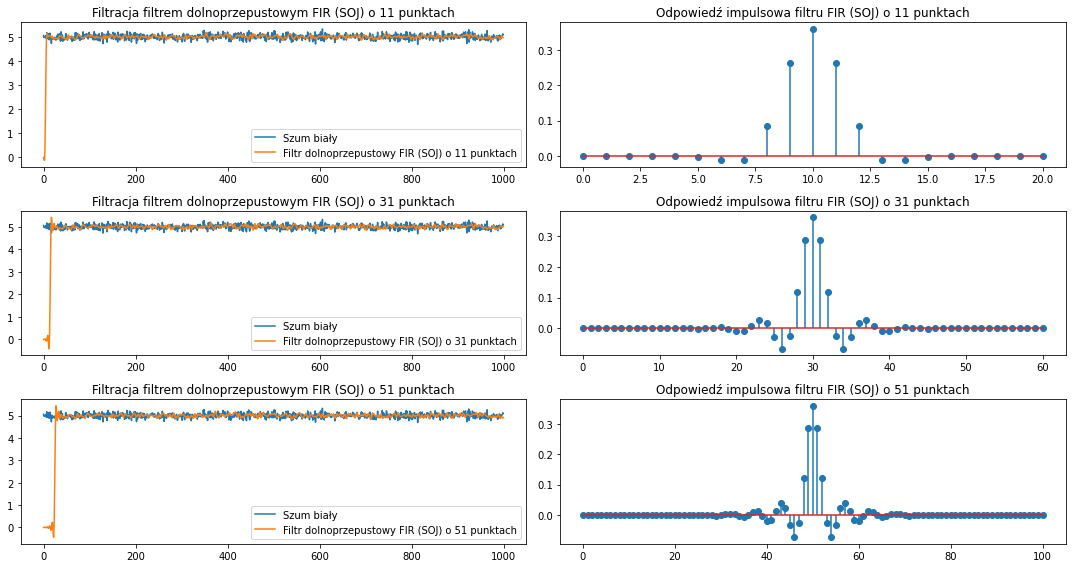

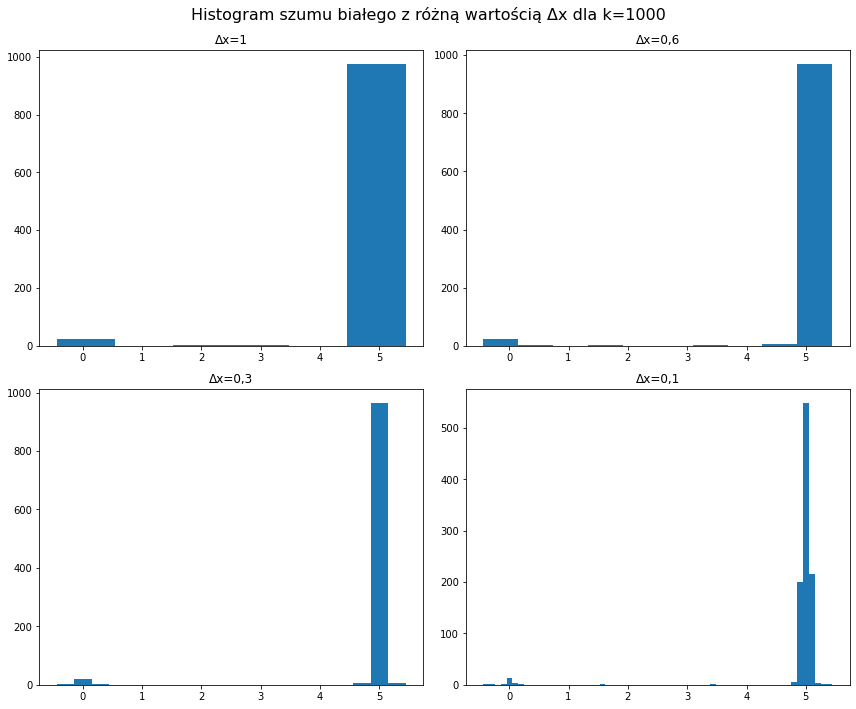

In [75]:
noise_after_filtration_k3_fc900 = filtration(samples_k_3, 900)
display_hist(noise_after_filtration_k3_fc900, k_3)

#### fcutoff=1600Hz

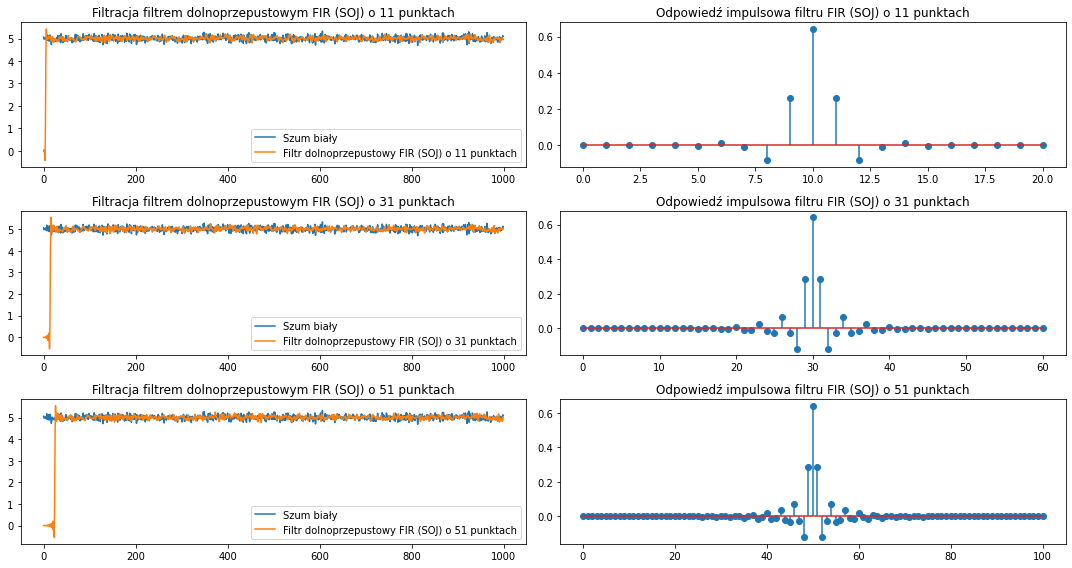

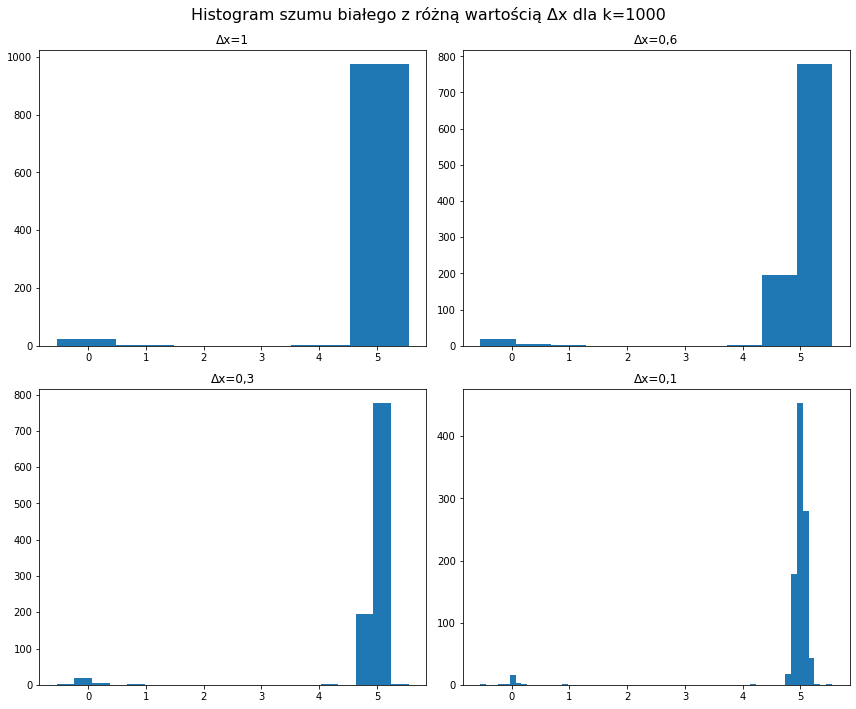

In [76]:
noise_after_filtration_k3_fc1600 = filtration(samples_k_3, 1600)
display_hist(noise_after_filtration_k3_fc1600, k_3)

### Dla k=10^(4)

#### fcutoff=300

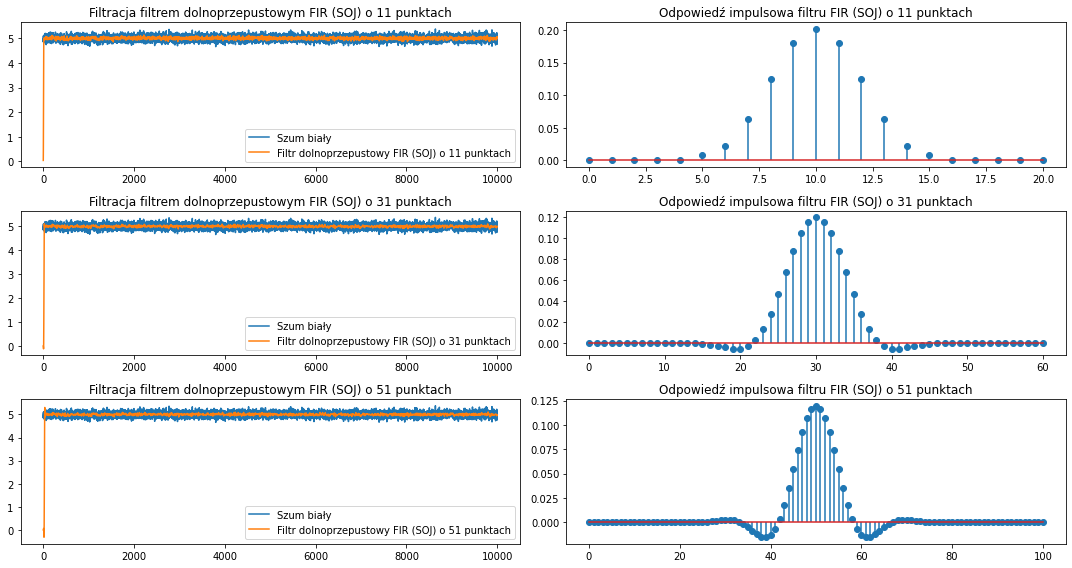

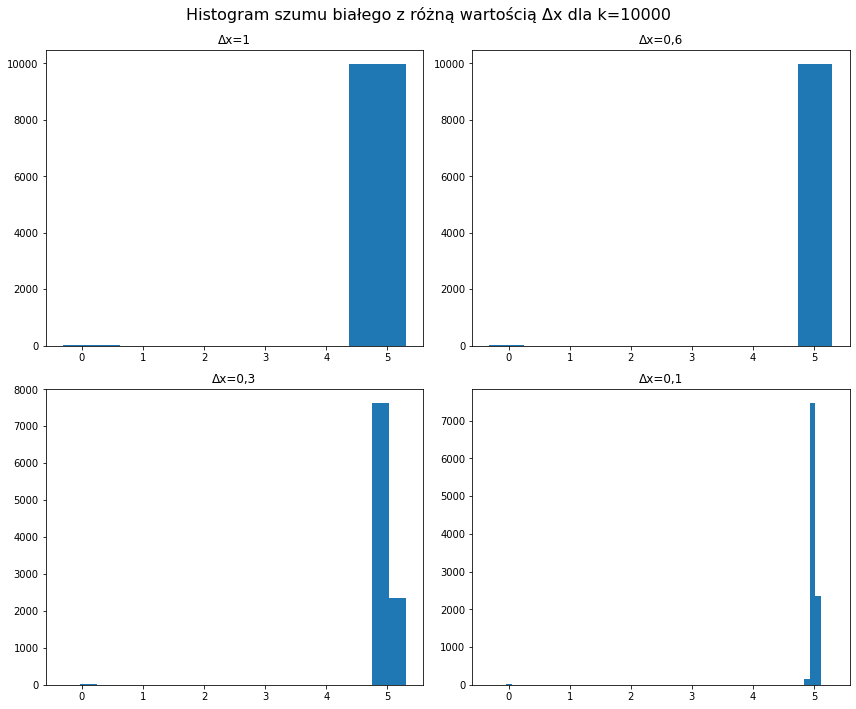

In [77]:
noise_after_filtration_k4_fc300 = filtration(samples_k_4, 300)
display_hist(noise_after_filtration_k4_fc300, k_4)

#### fcutoff=900

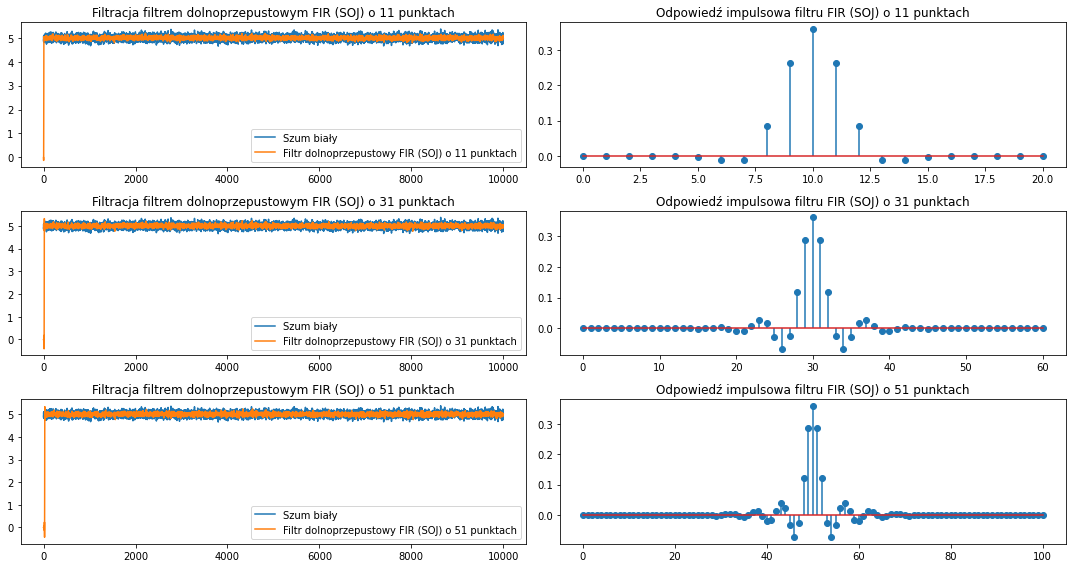

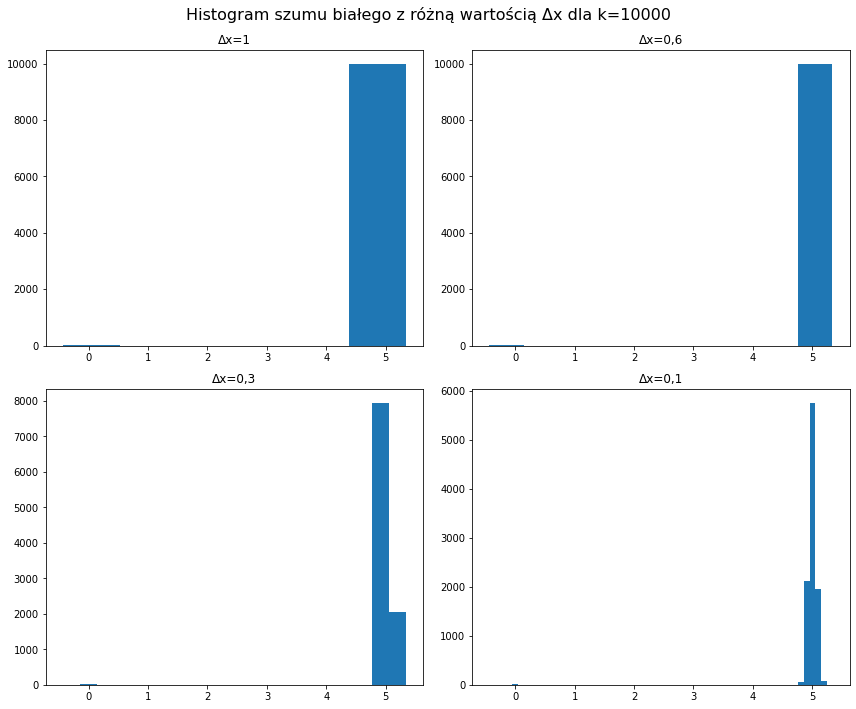

In [78]:
noise_after_filtration_k4_fc900 = filtration(samples_k_4, 900)
display_hist(noise_after_filtration_k4_fc900, k_4)

#### fcutoff=1600

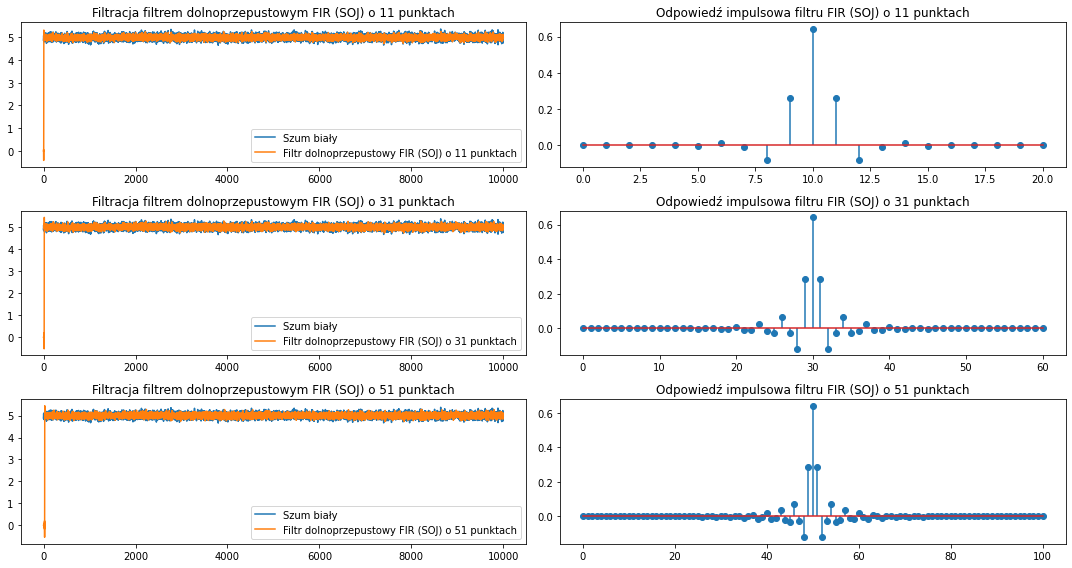

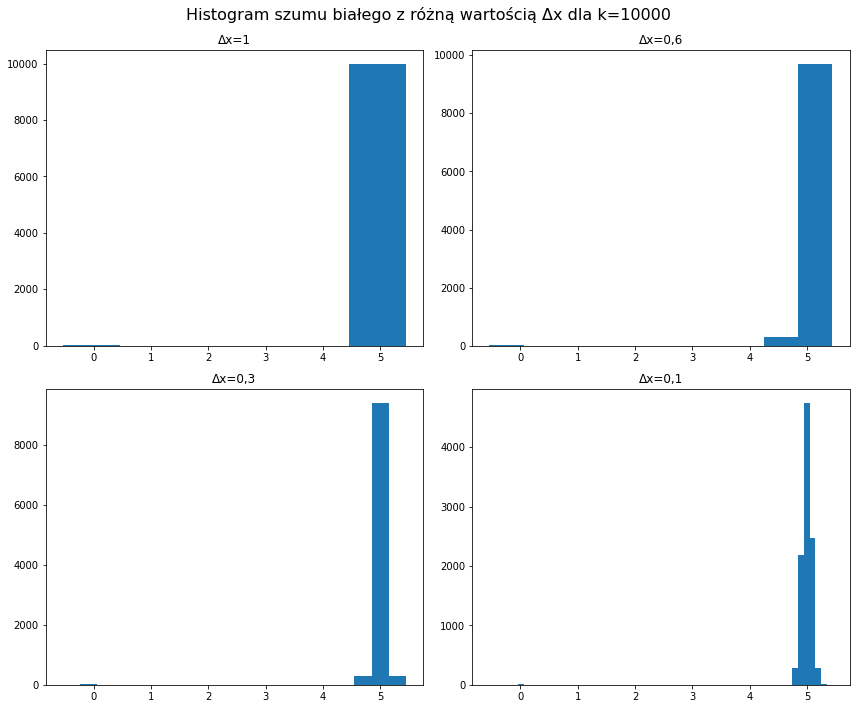

In [79]:
noise_after_filtration_k4_fc1600 = filtration(samples_k_4, 1600)
display_hist(noise_after_filtration_k4_fc1600, k_4)

### Dla k=10^(5)

#### fcutoff=300

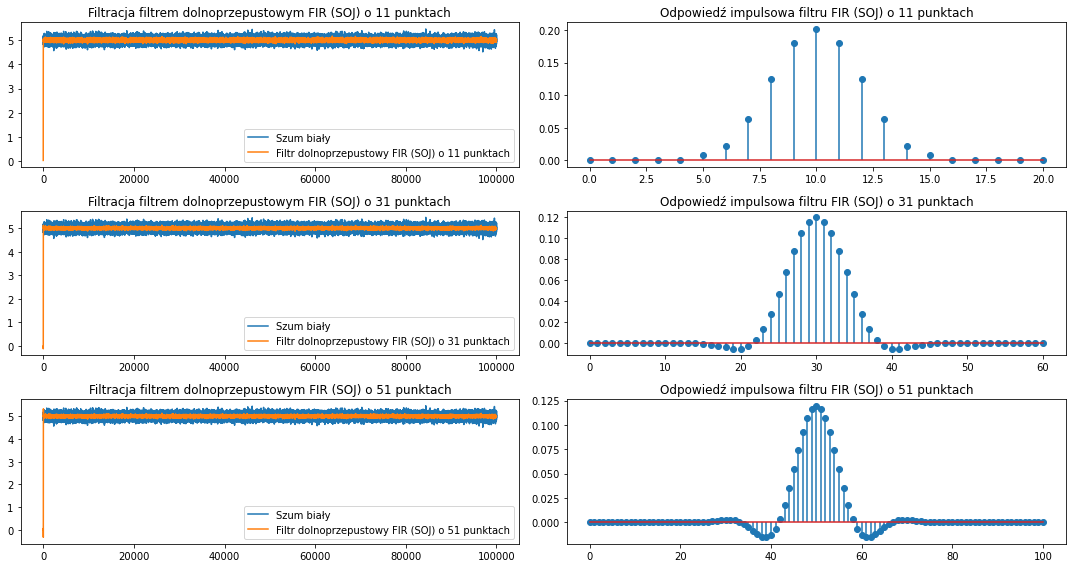

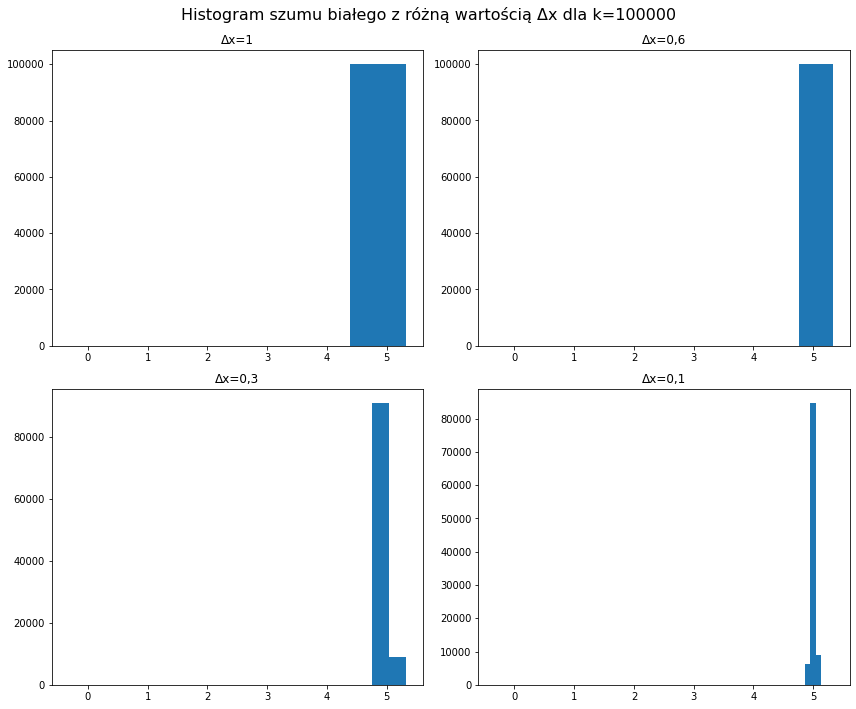

In [80]:
noise_after_filtration_k5_fc300 = filtration(samples_k_5, 300)
display_hist(noise_after_filtration_k5_fc300, k_5)

#### fcutoff=900

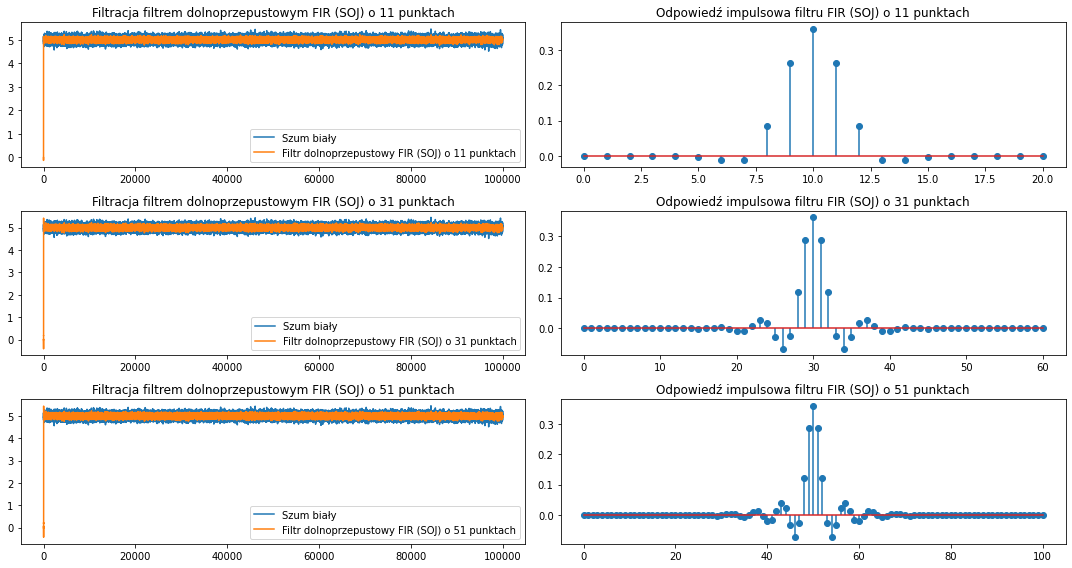

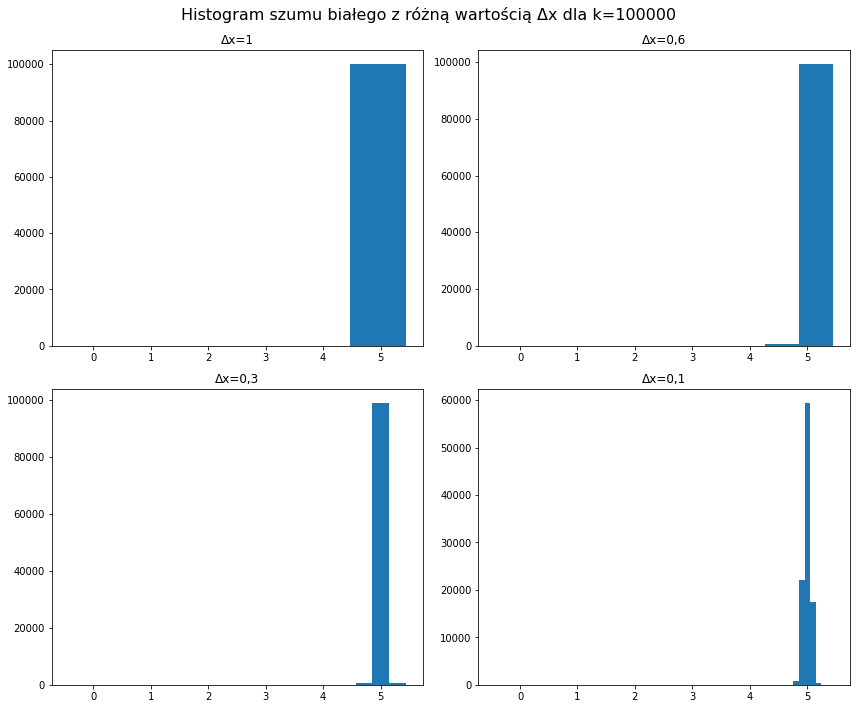

In [81]:
noise_after_filtration_k5_fc900 = filtration(samples_k_5, 900)
display_hist(noise_after_filtration_k5_fc900, k_5)

#### fcutoff=1600

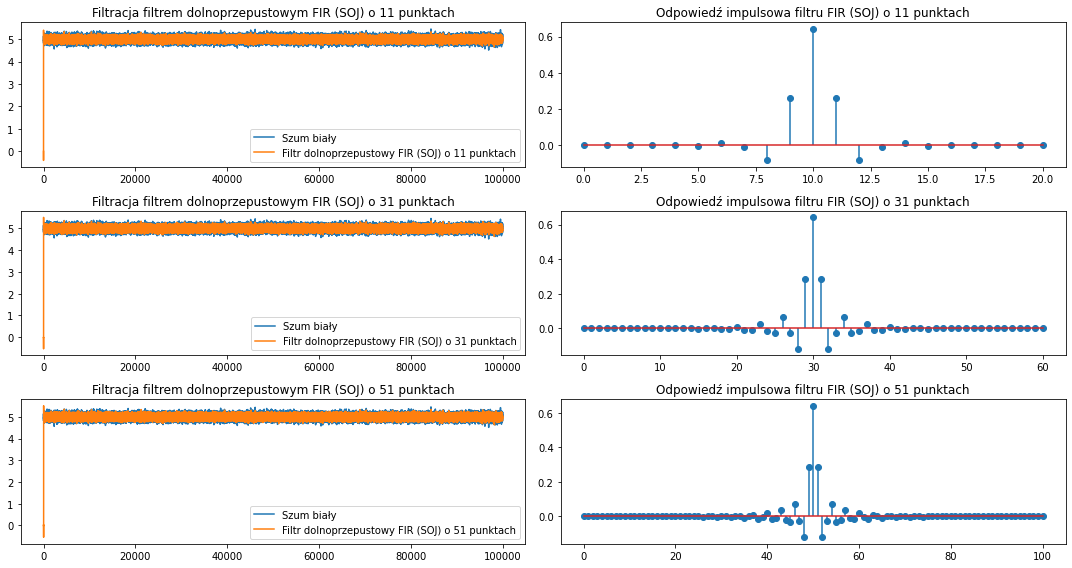

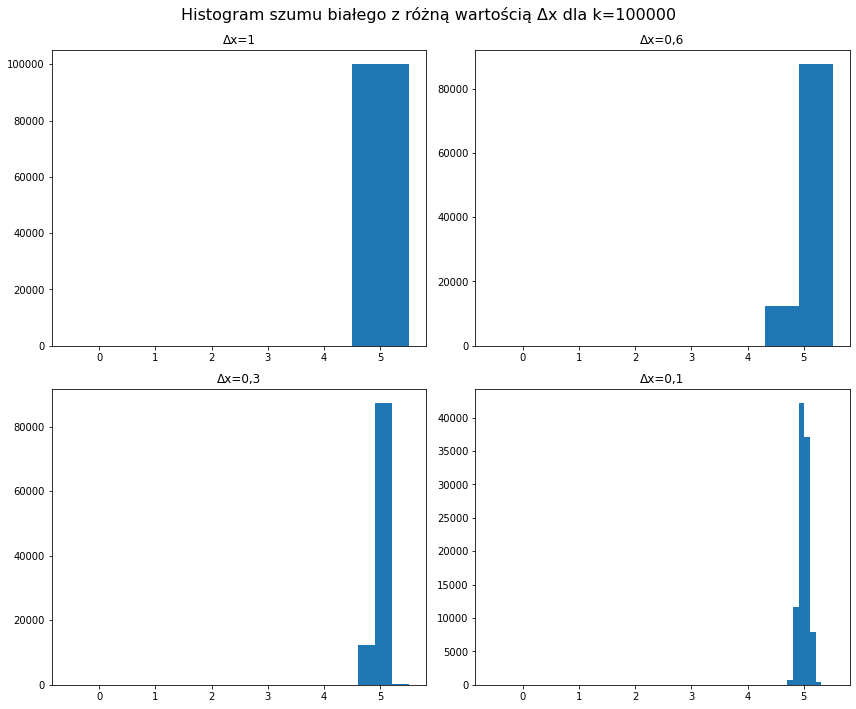

In [82]:
noise_after_filtration_k5_fc1600 = filtration(samples_k_5, 1600)
display_hist(noise_after_filtration_k5_fc1600, k_5)

### Dla k=10^(6)

#### fcutoff=300

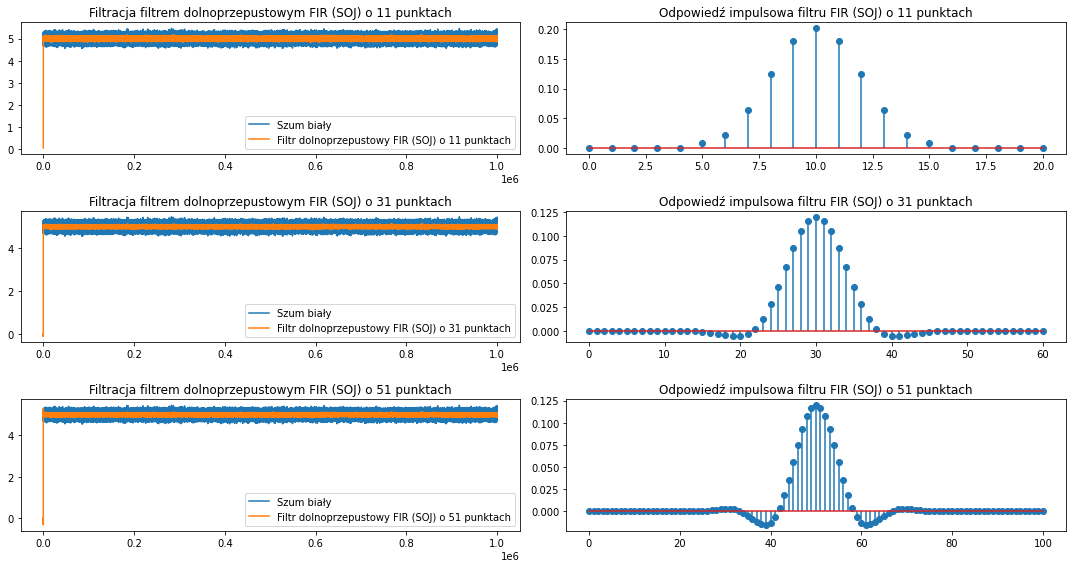

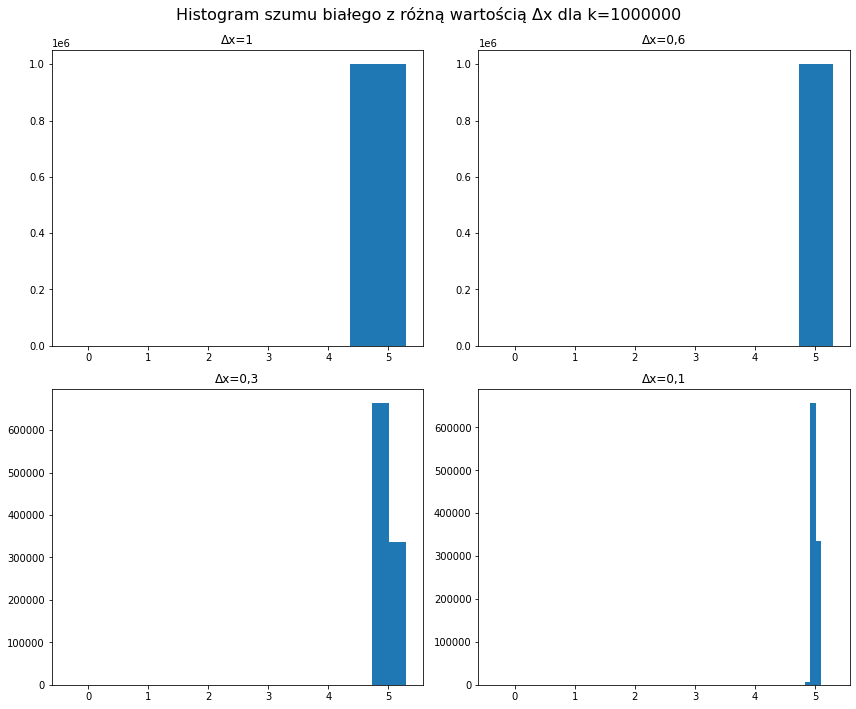

In [83]:
noise_after_filtration_k6_fc300 = filtration(samples_k_6, 300)
display_hist(noise_after_filtration_k6_fc300, k_6)

#### fcutoff=900

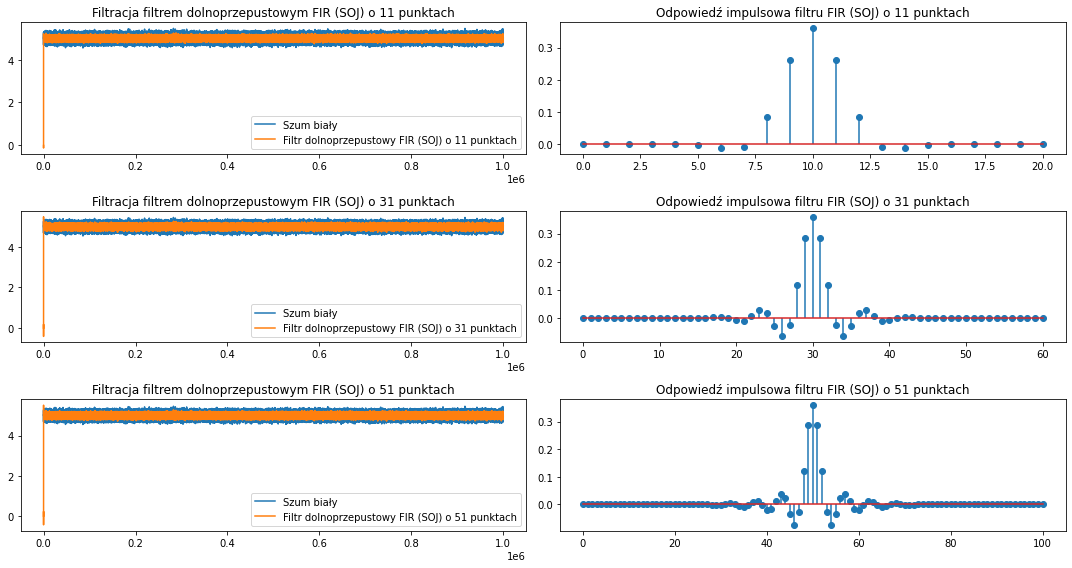

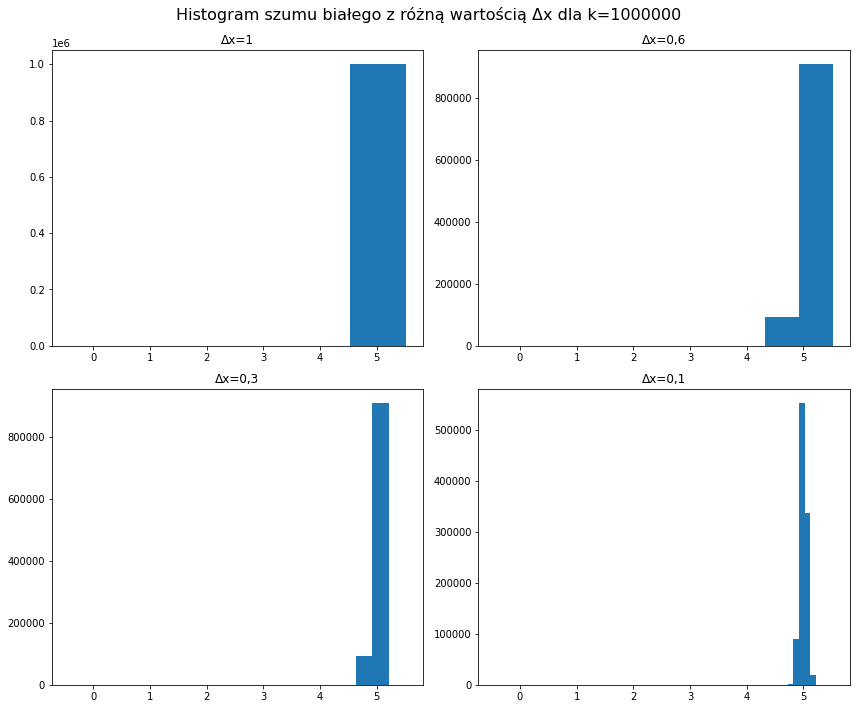

In [84]:
noise_after_filtration_k6_fc900 = filtration(samples_k_6, 900)
display_hist(noise_after_filtration_k6_fc900, k_6)

#### fcutoff=1600

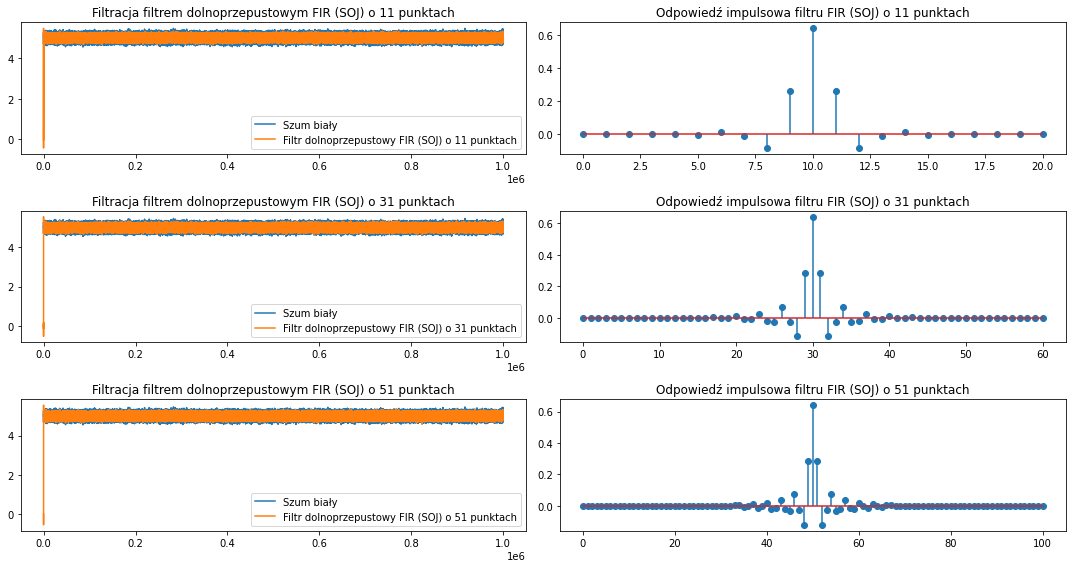

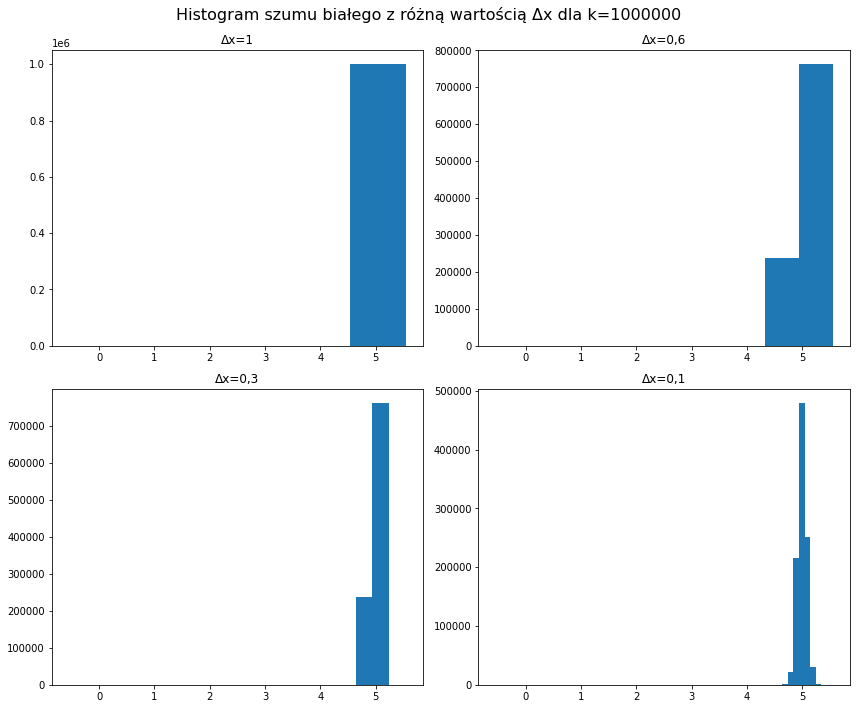

In [85]:
noise_after_filtration_k6_fc1600 = filtration(samples_k_6, 1600)
display_hist(noise_after_filtration_k6_fc1600, k_6)

#### Dla k=10^(7)

#### fcutoff=300

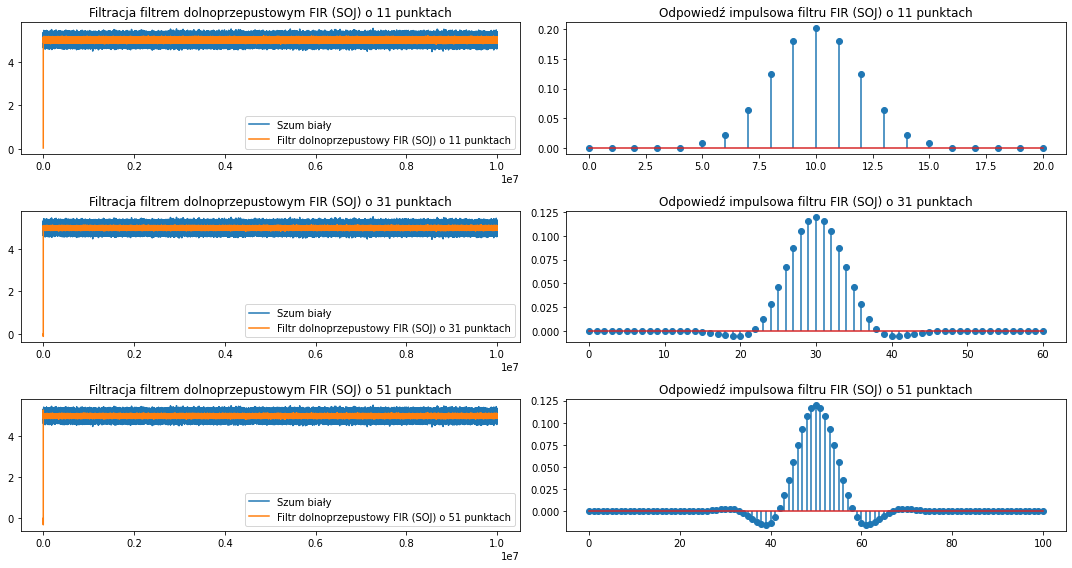

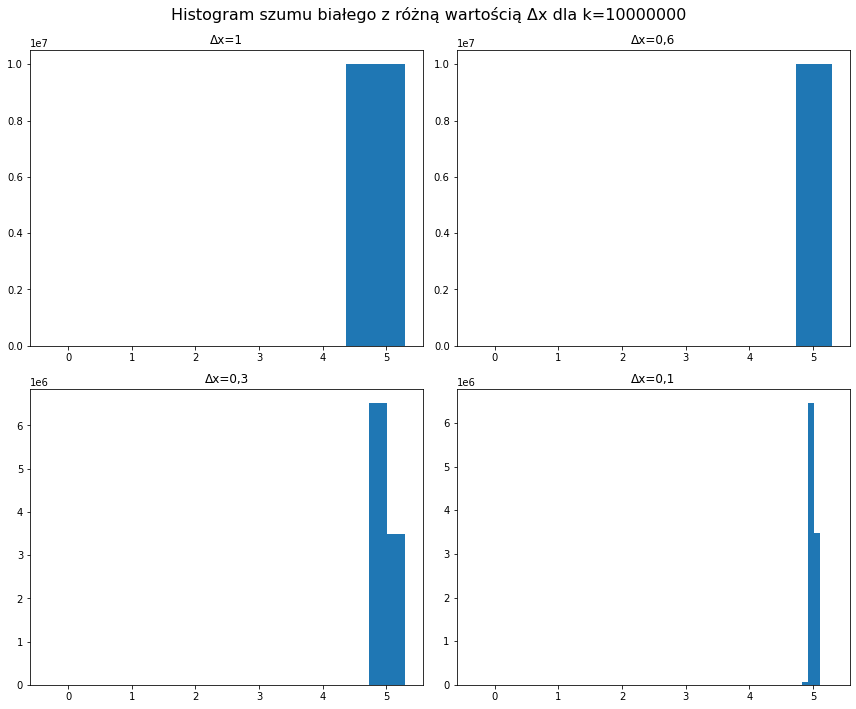

In [86]:
noise_after_filtration_k7_fc300 = filtration(samples_k_7, 300)
display_hist(noise_after_filtration_k7_fc300, k_7)

#### fcutoff=900

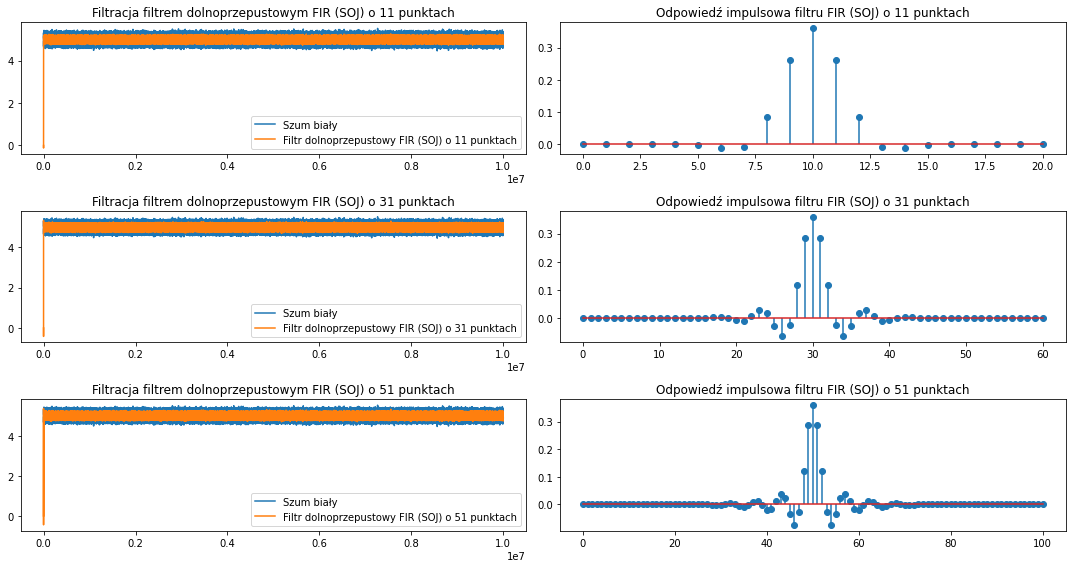

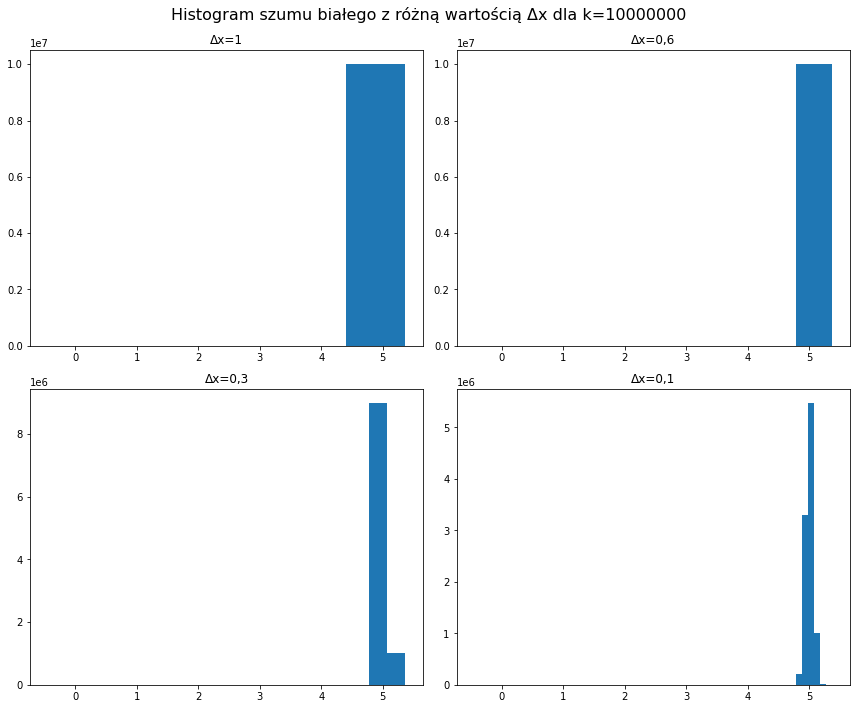

In [87]:
noise_after_filtration_k7_fc900 = filtration(samples_k_7, 900)
display_hist(noise_after_filtration_k7_fc900, k_7)

#### fcutoff=1600

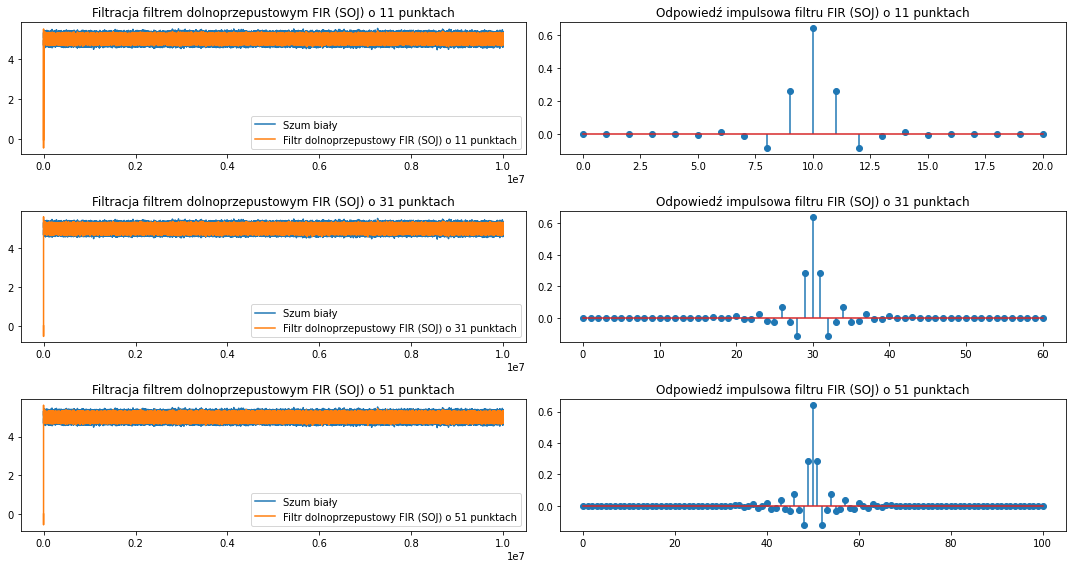

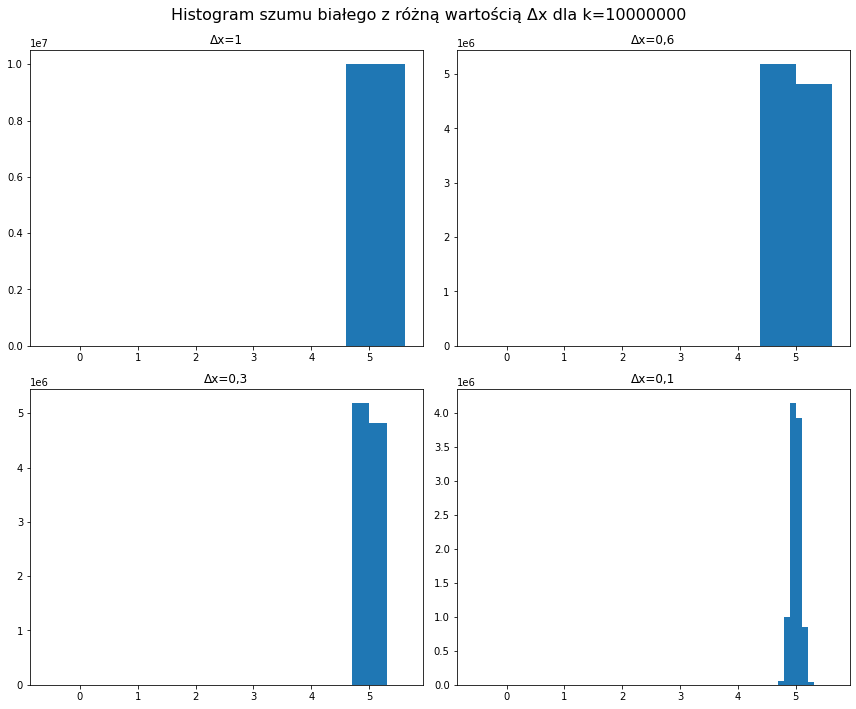

In [88]:
noise_after_filtration_k7_fc1600 = filtration(samples_k_7, 1600)
display_hist(noise_after_filtration_k7_fc1600, k_7)

## 4. Obliczyć gęstość prawdopodobieństwa, dystrybuantę, a też wartość oczekiwaną, wariancję i funkcję kowariancyjną sygnału wyjściowego. Porównać wyniki z p 2.

### Obliczenie gęstości prawdopodobieństwa

$$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

Po zastosowaniu filtru dolnoprzepustowego FIR na sygnale wyjściowym, gęstość prawdopodobieństwa uległa zmianie w porównaniu do szumu białego. Wartości sygnału wyjściowego skupiają się wokół wartości oczekiwanej, a rozkład jest bardziej skoncentrowany.

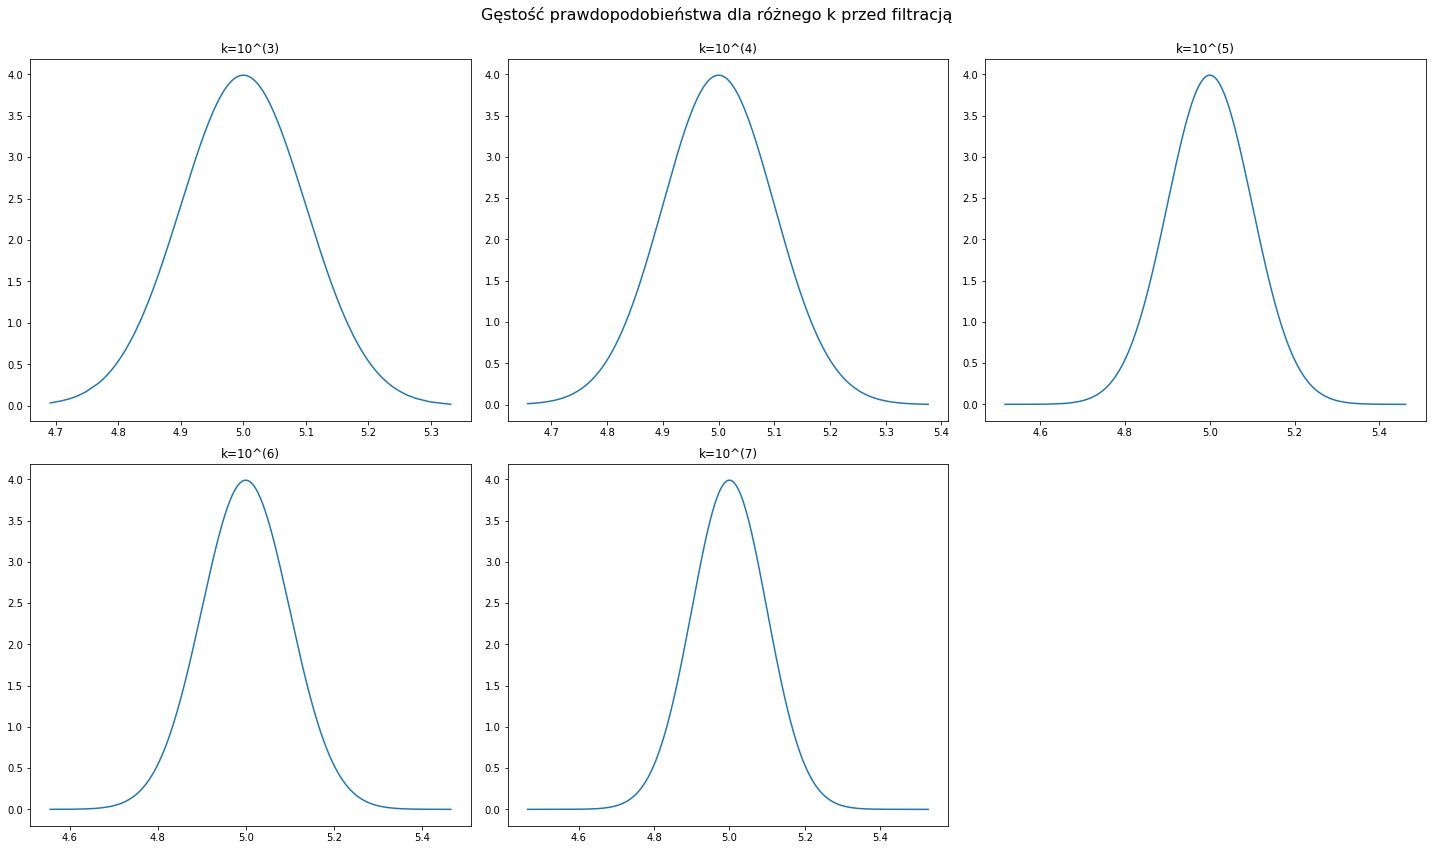

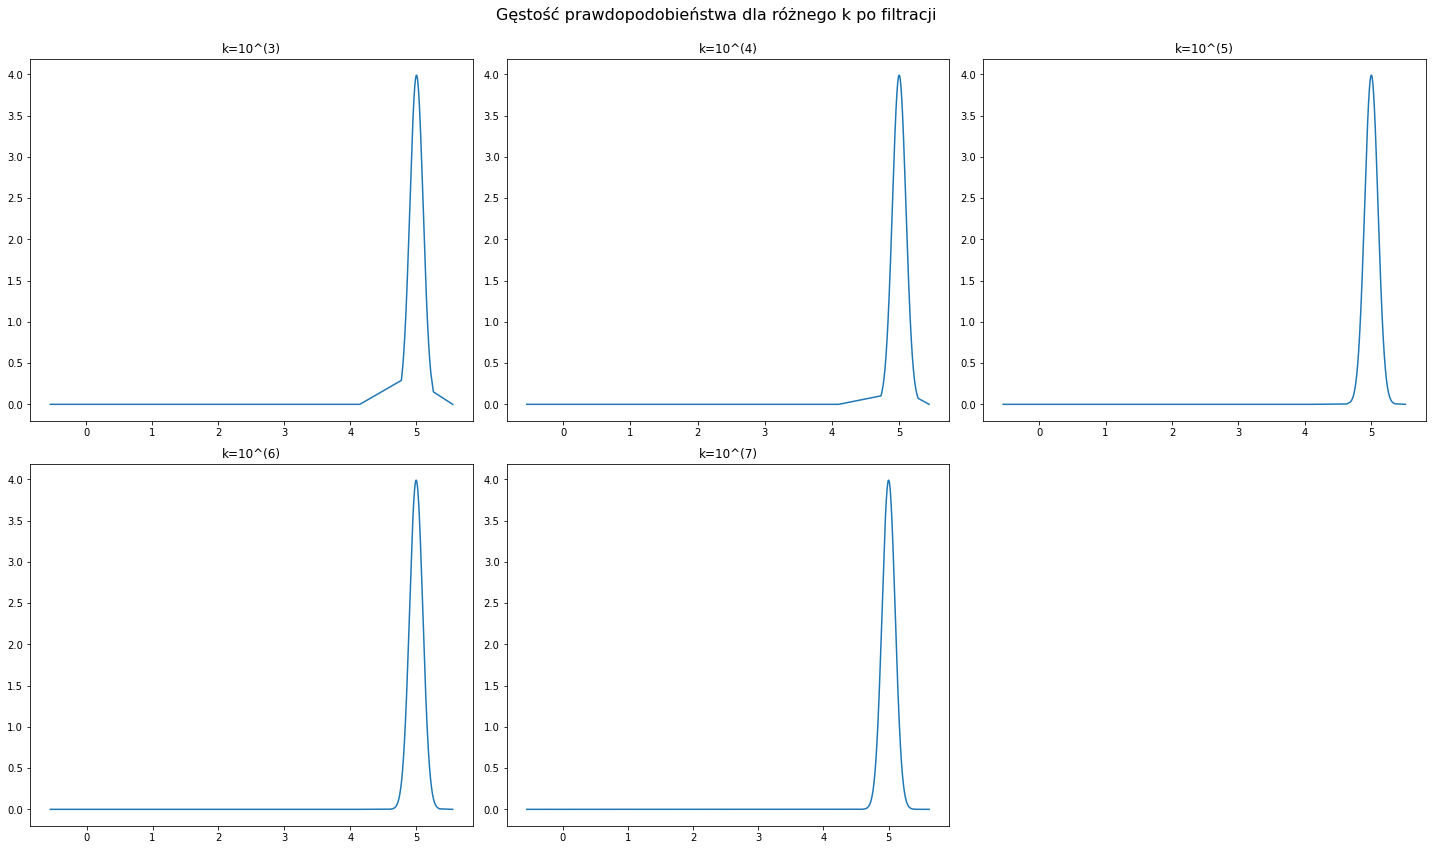

In [89]:
fig_2, axarr_2 = plt.subplots(2, 3)
fig_2.set_figheight(12)
fig_2.set_figwidth(20)
fig_2.suptitle("Gęstość prawdopodobieństwa dla różnego k przed filtracją", fontsize=16)

axarr_2[0, 0].plot(np.sort(samples_k_3), probability_pdf(samples_k_3))
axarr_2[0, 0].set_title('k=10^(3)')
axarr_2[0, 1].plot(np.sort(samples_k_4), probability_pdf(samples_k_4))
axarr_2[0, 1].set_title('k=10^(4)')
axarr_2[0, 2].plot(np.sort(samples_k_5), probability_pdf(samples_k_5))
axarr_2[0, 2].set_title('k=10^(5)')
axarr_2[1, 0].plot(np.sort(samples_k_6), probability_pdf(samples_k_6))
axarr_2[1, 0].set_title('k=10^(6)')
axarr_2[1, 1].plot(np.sort(samples_k_7), probability_pdf(samples_k_7))
axarr_2[1, 1].set_title('k=10^(7)')
axarr_2[1, 2].set_visible(False)

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig_2.tight_layout()
fig_2.subplots_adjust(top=0.92)

fig_1, axarr_1 = plt.subplots(2, 3)
fig_1.set_figheight(12)
fig_1.set_figwidth(20)
fig_1.suptitle("Gęstość prawdopodobieństwa dla różnego k po filtracji", fontsize=16)

axarr_1[0, 0].plot(np.sort(noise_after_filtration_k3_fc1600), probability_pdf(noise_after_filtration_k3_fc1600))
axarr_1[0, 0].set_title('k=10^(3)')
axarr_1[0, 1].plot(np.sort(noise_after_filtration_k4_fc1600), probability_pdf(noise_after_filtration_k4_fc1600))
axarr_1[0, 1].set_title('k=10^(4)')
axarr_1[0, 2].plot(np.sort(noise_after_filtration_k5_fc1600), probability_pdf(noise_after_filtration_k5_fc1600))
axarr_1[0, 2].set_title('k=10^(5)')
axarr_1[1, 0].plot(np.sort(noise_after_filtration_k6_fc1600), probability_pdf(noise_after_filtration_k6_fc1600))
axarr_1[1, 0].set_title('k=10^(6)')
axarr_1[1, 1].plot(np.sort(noise_after_filtration_k7_fc1600), probability_pdf(noise_after_filtration_k7_fc1600))
axarr_1[1, 1].set_title('k=10^(7)')
axarr_1[1, 2].set_visible(False)

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig_1.tight_layout()
fig_1.subplots_adjust(top=0.92)

plt.show()

### Obliczenie dystrybuanty

$$ F(x) = \frac{1}{2}\left[1 + \operatorname{erf}\left(\frac{x-\mu}{\sigma\sqrt{2}}\right)\right] $$

Dystrybuanta sygnału wyjściowego również różni się od dystrybuanty szumu białego. Po zastosowaniu filtru dolnoprzepustowego FIR, dystrybuanta staje się bardziej "płaska" i gładka, co wskazuje na redukcję wysokich częstotliwości i wygładzenie sygnału.

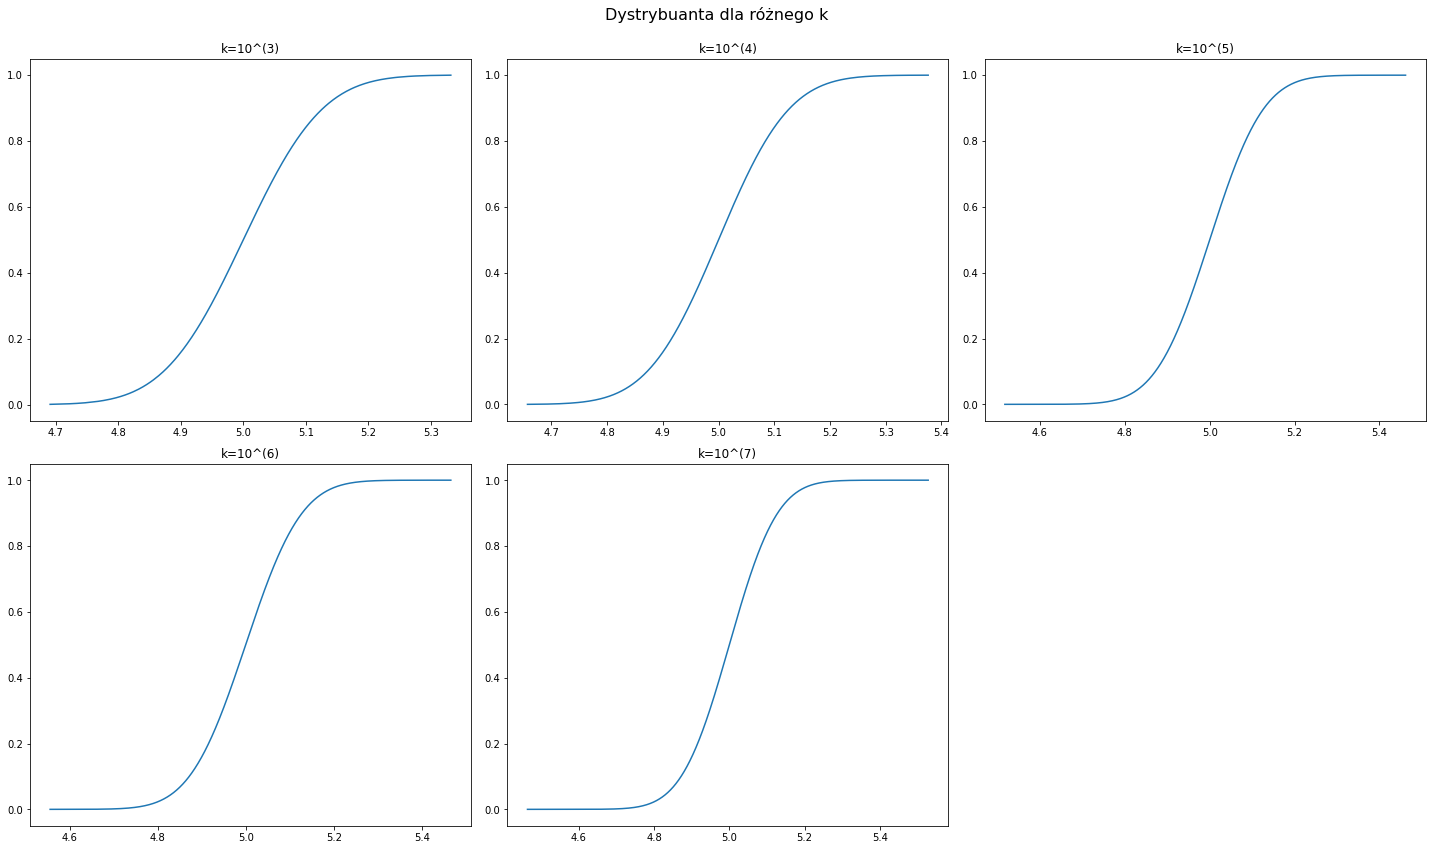

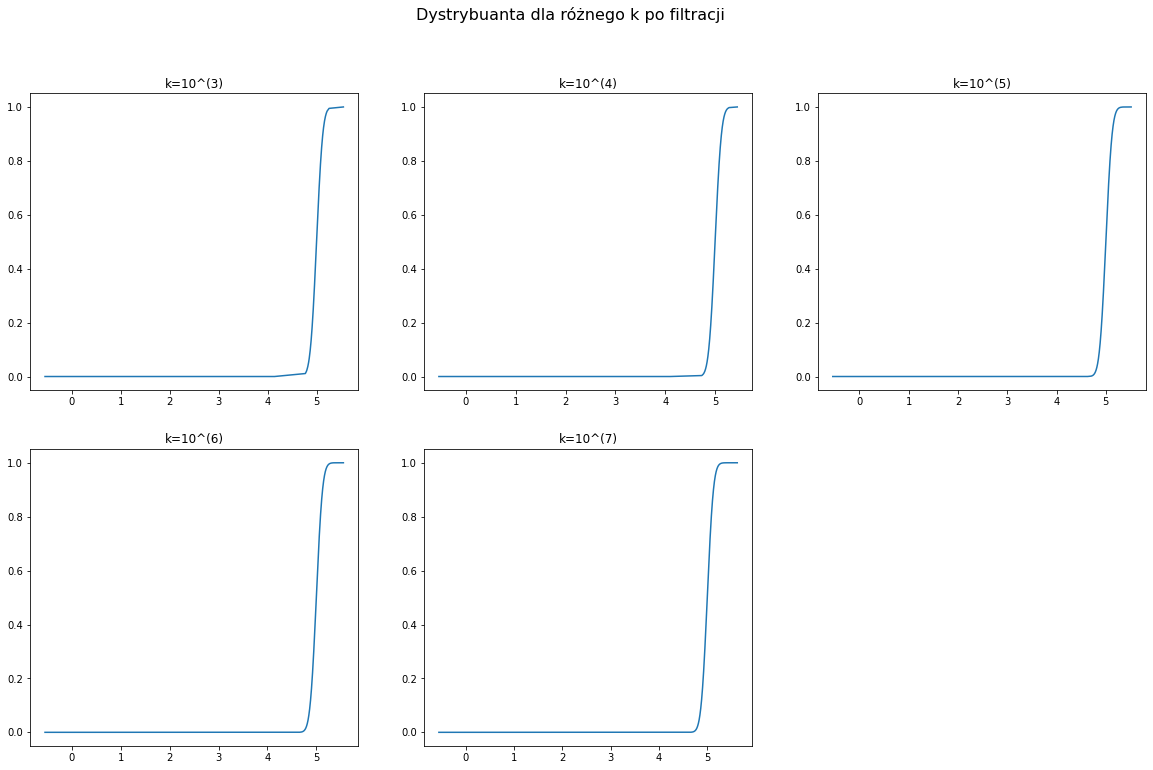

In [90]:
# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig_1.tight_layout()
fig_1.subplots_adjust(top=0.92)

fig_2, axarr_2 = plt.subplots(2, 3)
fig_2.set_figheight(12)
fig_2.set_figwidth(20)
fig_2.suptitle("Dystrybuanta dla różnego k", fontsize=16)

axarr_2[0, 0].plot(np.sort(samples_k_3), norm_cdf(samples_k_3))
axarr_2[0, 0].set_title('k=10^(3)')
axarr_2[0, 1].plot(np.sort(samples_k_4), norm_cdf(samples_k_4))
axarr_2[0, 1].set_title('k=10^(4)')
axarr_2[0, 2].plot(np.sort(samples_k_5), norm_cdf(samples_k_5))
axarr_2[0, 2].set_title('k=10^(5)')
axarr_2[1, 0].plot(np.sort(samples_k_6), norm_cdf(samples_k_6))
axarr_2[1, 0].set_title('k=10^(6)')
axarr_2[1, 1].plot(np.sort(samples_k_7), norm_cdf(samples_k_7))
axarr_2[1, 1].set_title('k=10^(7)')
axarr_2[1, 2].set_visible(False)

# Tight layout often produces nice results
# but requires the title to be spaced accordingly
fig_2.tight_layout()
fig_2.subplots_adjust(top=0.92)

fig_1, axarr_1 = plt.subplots(2, 3)
fig_1.set_figheight(12)
fig_1.set_figwidth(20)
fig_1.suptitle("Dystrybuanta dla różnego k po filtracji", fontsize=16)

axarr_1[0, 0].plot(np.sort(noise_after_filtration_k3_fc1600), norm_cdf(noise_after_filtration_k3_fc1600))
axarr_1[0, 0].set_title('k=10^(3)')
axarr_1[0, 1].plot(np.sort(noise_after_filtration_k4_fc1600), norm_cdf(noise_after_filtration_k4_fc1600))
axarr_1[0, 1].set_title('k=10^(4)')
axarr_1[0, 2].plot(np.sort(noise_after_filtration_k5_fc1600), norm_cdf(noise_after_filtration_k5_fc1600))
axarr_1[0, 2].set_title('k=10^(5)')
axarr_1[1, 0].plot(np.sort(noise_after_filtration_k6_fc1600), norm_cdf(noise_after_filtration_k6_fc1600))
axarr_1[1, 0].set_title('k=10^(6)')
axarr_1[1, 1].plot(np.sort(noise_after_filtration_k7_fc1600), norm_cdf(noise_after_filtration_k7_fc1600))
axarr_1[1, 1].set_title('k=10^(7)')
axarr_1[1, 2].set_visible(False)

plt.show()

### Obliczenie wartości oczekiwanej

$$ E(X) = \int_{-\infty}^{\infty} x f(x) dx $$

Wartość oczekiwana sygnału wyjściowego po filtracji jest zbliżona do wartości oczekiwanej szumu białego, jednak może ulec nieznacznym przesunięciom ze względu na charakterystykę filtru.

In [91]:
#Dla k=10^(3)
expected_value_k1_after_filtration = describe(noise_after_filtration_k3_fc1600).mean
#Dla k=10^(4)
expected_value_k2_after_filtration = describe(noise_after_filtration_k4_fc1600).mean
#Dla k=10^(5)
expected_value_k3_after_filtration = describe(noise_after_filtration_k5_fc1600).mean
#Dla k=10^(6)
expected_value_k4_after_filtration = describe(noise_after_filtration_k6_fc1600).mean
#Dla k=10^(7)
expected_value_k5_after_filtration = describe(noise_after_filtration_k7_fc1600).mean

### Obliczenie wariancji

$$ \operatorname{Var}(X) = E\left[(X - E(X))^2\right] = \int_{-\infty}^{\infty} (x - E(X))^2 f(x) dx $$

Wariancja sygnału wyjściowego jest mniejsza niż wariancja szumu białego. Filtr dolnoprzepustowy FIR redukuje wysokie częstotliwości, co prowadzi do zmniejszenia zmienności sygnału i zmniejszenia wariancji.

In [92]:
#Dla k=10^(3)
variance_k1_after_filtration = describe(noise_after_filtration_k3_fc1600).variance
#Dla k=10^(4)
variance_k2_after_filtration = describe(noise_after_filtration_k4_fc1600).variance
#Dla k=10^(5)
variance_k3_after_filtration = describe(noise_after_filtration_k5_fc1600).variance
#Dla k=10^(6)
variance_k4_after_filtration = describe(noise_after_filtration_k6_fc1600).variance
#Dla k=10^(7)
variance_k5_after_filtration = describe(noise_after_filtration_k7_fc1600).variance

Podsumowanie obliczeń wartości oczekiwanej oraz kowariancji względem różnych k

In [99]:
dict = {'k' : ['k^(3)', 'k^(4)', 'k^(5)', 'k^(6)', 'k^(7)'],
        'wartość oczekiwana' : [expected_value_k1, expected_value_k2, expected_value_k3, expected_value_k4, expected_value_k5],
        'wariancja' : [variance_k1, variance_k2, variance_k3, variance_k4, variance_k5],
        'wartość oczekiwana po filtracji' : [expected_value_k1_after_filtration, expected_value_k2_after_filtration, expected_value_k3_after_filtration, expected_value_k4_after_filtration, expected_value_k5_after_filtration],
        'wariancja po filtracji' : [variance_k1_after_filtration, variance_k2_after_filtration, variance_k3_after_filtration, variance_k4_after_filtration, variance_k5_after_filtration]}

df = pd.DataFrame(dict)

# df.style

print(df.to_latex('./tables/table_2.tex'))

None


C:\Users\maszy\AppData\Local\Temp\ipykernel_13340\577880823.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex('./tables/table_2.tex'))


### Obliczenie funkcji kowariancyjnej

Macierz kowariancji sygnału wyjściowego może różnić się od macierzy kowariancji szumu białego. Filtracja dolnoprzepustowa wpływa na korelację między próbkami sygnału, co może prowadzić do zmiany wzajemnego wpływu próbek na siebie.

$$ \operatorname{Cov}(X_i, X_j) = \begin{cases} \sigma^2 & i = j \\ 0 & i \neq j \end{cases} $$

gdzie X_i i X_j to próbki szumu białego, a σ^2 to wariancja szumu białego.

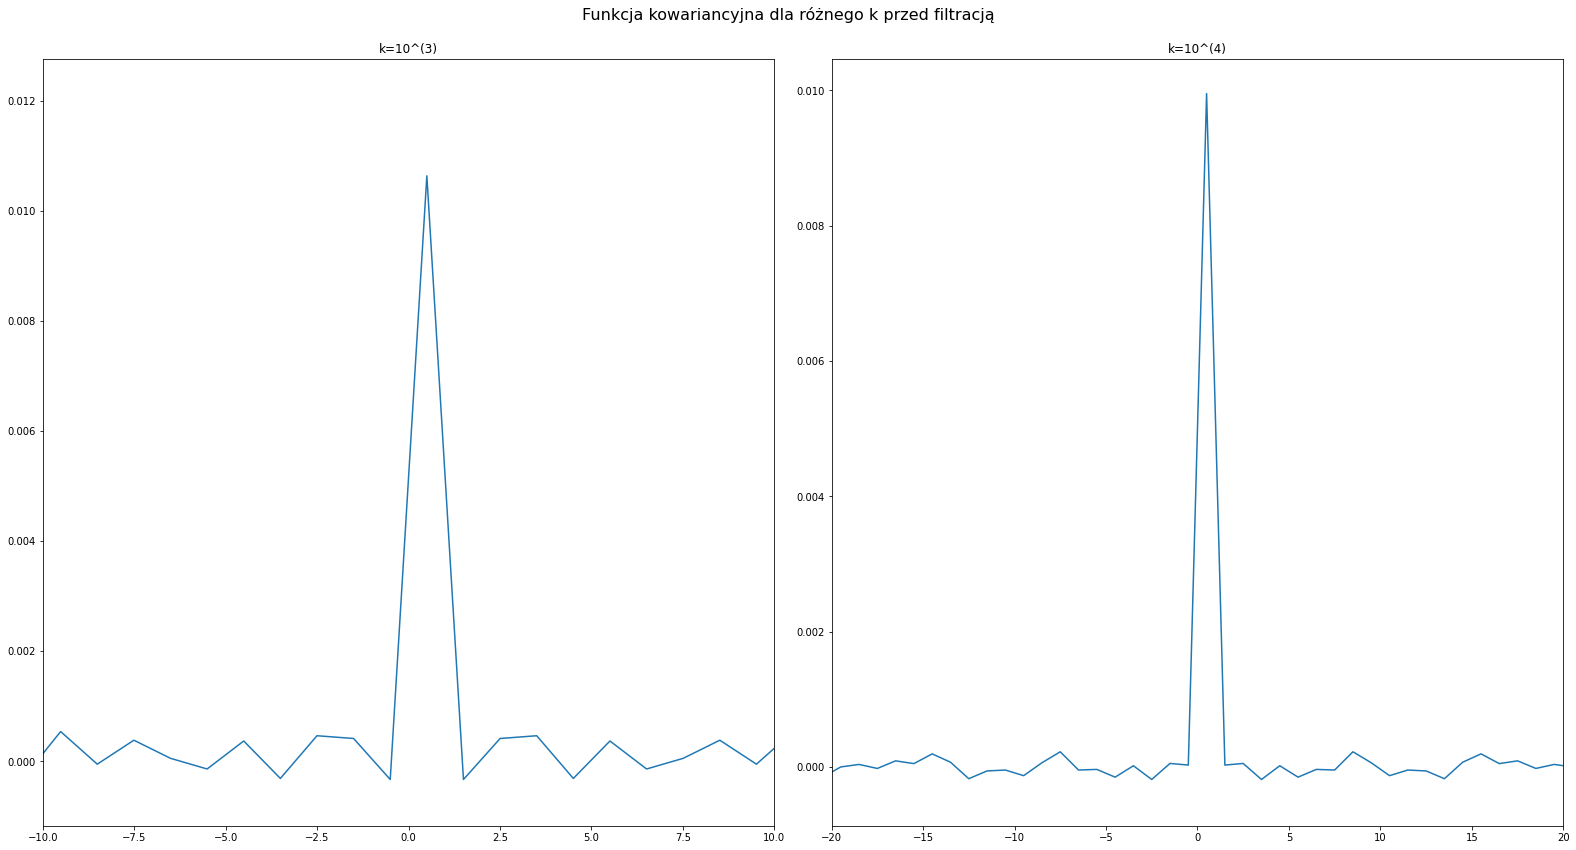

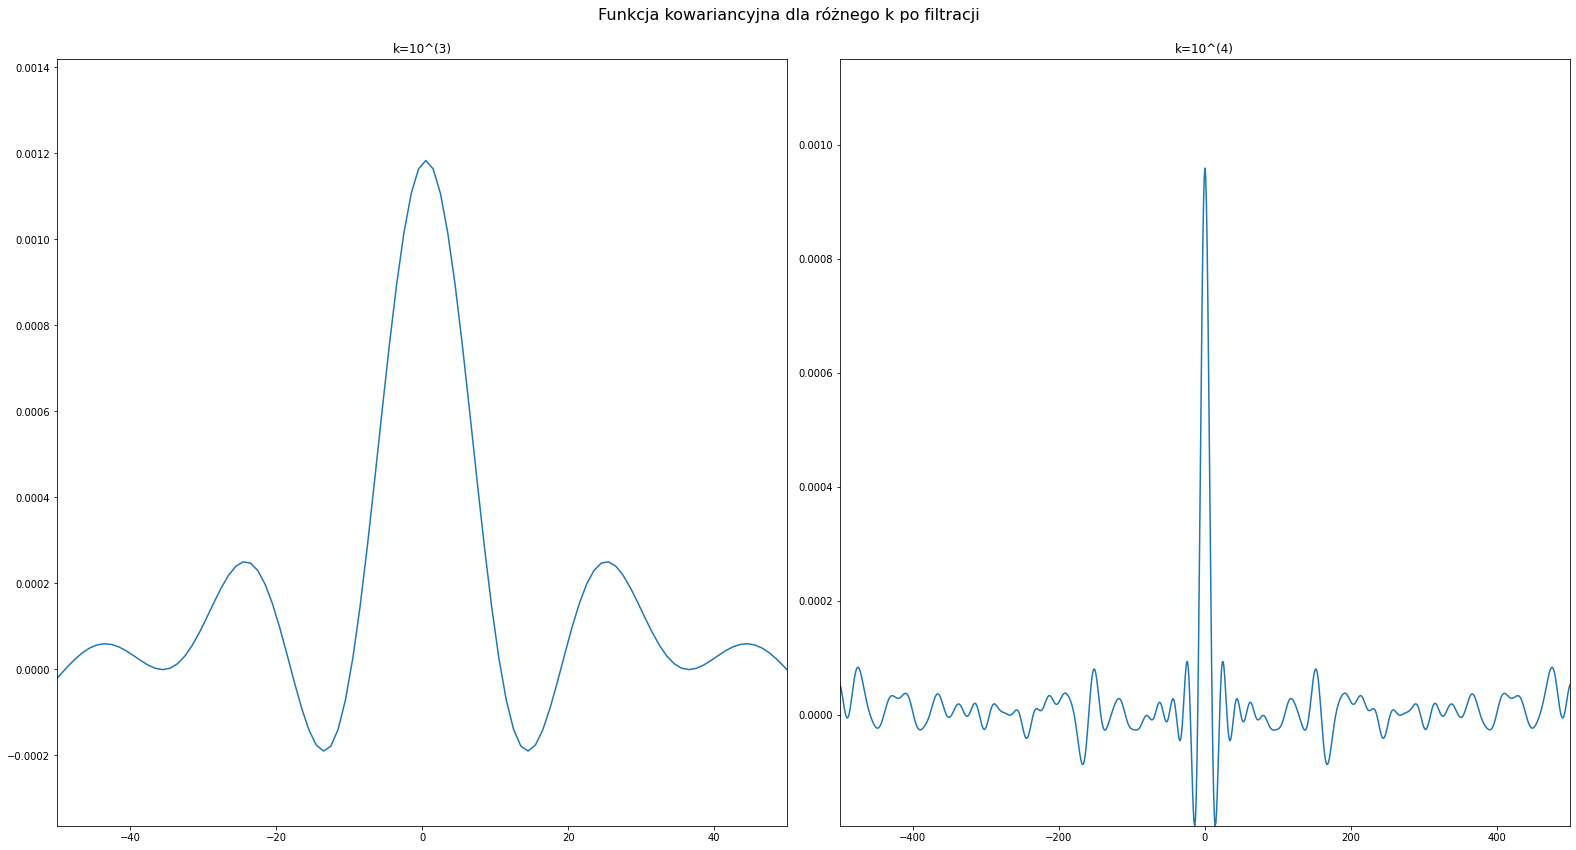

In [94]:
fig, axarr = plt.subplots(1, 2)
fig.set_figheight(12)
fig.set_figwidth(22)
fig.suptitle("Funkcja kowariancyjna dla różnego k przed filtracją", fontsize=16)

cov_k_3 = covariance(samples_k_3, k_3)
cov_k_4 = covariance(samples_k_4, k_4)

x_k_3 = np.linspace(-k_3//2, k_3//2, len(cov_k_3))
x_k_4 = np.linspace(-k_4//2, k_4//2, len(cov_k_4))

# Zwiększenie wartości na osi Y
y_max_k_3 = np.max(cov_k_3) * 1.2
y_max_k_4 = np.max(cov_k_4) * 1.2

axarr[0].plot(x_k_3, cov_k_3)
axarr[0].set_title('k=10^(3)')
axarr[0].set_xlim(-k_3//100, k_3//100)
axarr[0].set_ylim(np.min(cov_k_3), y_max_k_3)

axarr[1].plot(x_k_4, cov_k_4)
axarr[1].set_title('k=10^(4)')
axarr[1].set_xlim(-k_4//500, k_4//500)

fig.tight_layout()
fig.subplots_adjust(top=0.92)

plt.show()


fig, axarr = plt.subplots(1, 2)
fig.set_figheight(12)
fig.set_figwidth(22)
fig.suptitle("Funkcja kowariancyjna dla różnego k po filtracji", fontsize=16)

# Wygładzanie funkcji kowariancji za pomocą filtru dolnoprzepustowego Butterworth
order = 11  # Stopień filtru
cutoff_freq = 0.1  # Częstotliwość odcięcia
b, a = butter(order, cutoff_freq, btype='low', analog=False)

cov_k_3_smooth = filtfilt(b, a, cov_k_3)
cov_k_4_smooth = filtfilt(b, a, cov_k_4)

# Zwiększenie wartości na osi Y
y_max_k_3 = np.max(cov_k_3_smooth) * 1.2
y_max_k_4 = np.max(cov_k_4_smooth) * 1.2

x_k_3 = np.linspace(-k_3//2, k_3//2, len(cov_k_3_smooth))
x_k_4 = np.linspace(-k_4//2, k_4//2, len(cov_k_4_smooth))

axarr[0].plot(x_k_3, cov_k_3_smooth)
axarr[0].set_title('k=10^(3)')
axarr[0].set_xlim(-k_3//20, k_3//20)
axarr[0].set_ylim(np.min(cov_k_3_smooth), y_max_k_3)

axarr[1].plot(x_k_4, cov_k_4_smooth)
axarr[1].set_title('k=10^(4)')
axarr[1].set_xlim(-k_4//20, k_4//20)
axarr[1].set_ylim(np.min(cov_k_4_smooth), y_max_k_4)

fig.tight_layout()
fig.subplots_adjust(top=0.92)

plt.show()

Ogólne wnioski:

Filtracja dolnoprzepustowa FIR może być użytecznym narzędziem w przetwarzaniu sygnałów, szczególnie w przypadkach, gdzie występuje szum o wysokich częstotliwościach lub gdy zależy nam na wygładzeniu sygnału i redukcji zmienności. Jest to popularna metoda w dziedzinach takich jak przetwarzanie sygnałów audio, obrazów, telekomunikacji, a także w analizie danych i filtracji szumów.